Overall Target

The goal of this capstone project is to guide you through solving a real-world regression problem using classic machine learning algorithms and approaches described in published research. The task is to predict housing price with public datsets. You will:

    Implement at least THREE classical ML algorithms learned in class

    Identify and implement ML approaches from TWO peer-reviewed research papers (published after 2020)

    Compare performance and interpret results

    Submit both a technical report and well-organized code

 
Dataset

House Prices - Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

Links to an external site.

You are encouraged to explore the data (handle missing values, encode categorical features, and normalize inputs) using proper preprocessing steps.

 
Tasks and Instructions
1. Understand the Dataset

    Summarize the features and target variable

    Explore basic statistics and perform data cleaning
    Clean the dataset

2. Implement Classic ML Algorithms

You are required to implement at least three of the algorithms learned in this course (you may use packages like scikit-learn).

Hyperparameter tuning matters sometimes. Report the best parameters found.
3. Literature-Based Implementation

3.1: Find Two Relevant Papers

Find two peer-reviewed or arXiv papers (published after 2020) that applied ML algorithms to housing price prediction or similar structured regression tasks (e.g., tabular or financial datasets).

Papers must:

    Use regression-based ML

    Have a clear methodology

    Be reproducible (not require proprietary data)

Example sources:

    Google Scholar

    arXiv.org 

    Links to an external site.

3.2: Re-implement the ML Methods

    Implement the algorithm or pipeline described in each paper

    Document key assumptions, equations, and choices

    Justify any simplifications you make

3.3: Compare Results

    Compare each paper’s approach against the classic models you implemented

    Use evaluation metrics (MSE, MAE)

    Include visualizations (e.g., residual plots, prediction error histograms)

4. Write Final Report

Prepare a technical report (at leaset 5 pages, PDF) containing:

The IEEE template is recommended (no matter Word, Latex or overleaf; regardless of conference or journal). Choose the one you like. 

    1. Introduction

        Problem statement and objective

        Summary of datasets used

    2. Methodology

        Preprocessing and feature engineering

        Explanation of the classical models used

        Summary and implementation of the two papers

    3. Results and Evaluation

        Comparison tables of performance like MSE

        Plots (e.g., actual vs. predicted values, feature importances)

        Interpretation of findings

    4. Discussion

        Why some models performed better than others

        Strengths and limitations of paper methods

        Reflection on challenges during reproduction

    5. Conclusion

        Summary of key insights

        Future work suggestions
    6. Implementation Code
        Include a GitHub link to your repository titled 'IntroMLCapstone'
        Five python files (could be in .py or .ipynb) at least, each for one model (3 models learned in class, 2 from literature). 
        Include a readme file in your repository, describing each file/folder you have. 

    7. References

        Include proper citations for the two papers and any libraries used


In [1183]:
import os
import random
import traceback
import sys
import traceback
import numpy as np
import pandas as pd
import sklearn as sklearn

In [1184]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [1185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

Models Learned In Class:
1. Linear Regression
2. Polynomial Regression
3. Ridge Regression

Models Learned From Academic Papers (Within Last 5 Years):

4. SVR (Support Vector Regression)
- J. Manasa, R. Gupta and N. S. Narahari, "Machine Learning based Predicting House Prices using Regression Techniques," 2020 2nd International Conference on Innovative Mechanisms for Industry Applications (ICIMIA), Bangalore, India, 2020, pp. 624-630, [Online]. Available: https://doi.org/10.1109/ICIMIA48430.2020.9074952
5. Random Forest
- Ho, W. K. O., Tang, B. S., & Wong, S. W, "Predicting property prices with machine learning algorithms", Journal of Property Research, 2021, 38(1), pp. 48–70, [Online]. Available: https://doi.org/10.1080/09599916.2020.1832558

In [1186]:
# Importing dataset
df_train = pd.read_csv('kaggle_housing_train.csv')
df_test = pd.read_csv('kaggle_housing_test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Visualization: Before Cleaning

C:\Users\herod\AppData\Local\Temp\ipykernel_27556\2581310355.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
C:\Users\herod\AppData\Local\Temp\ipykernel_27556\2581310355.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='rocket')


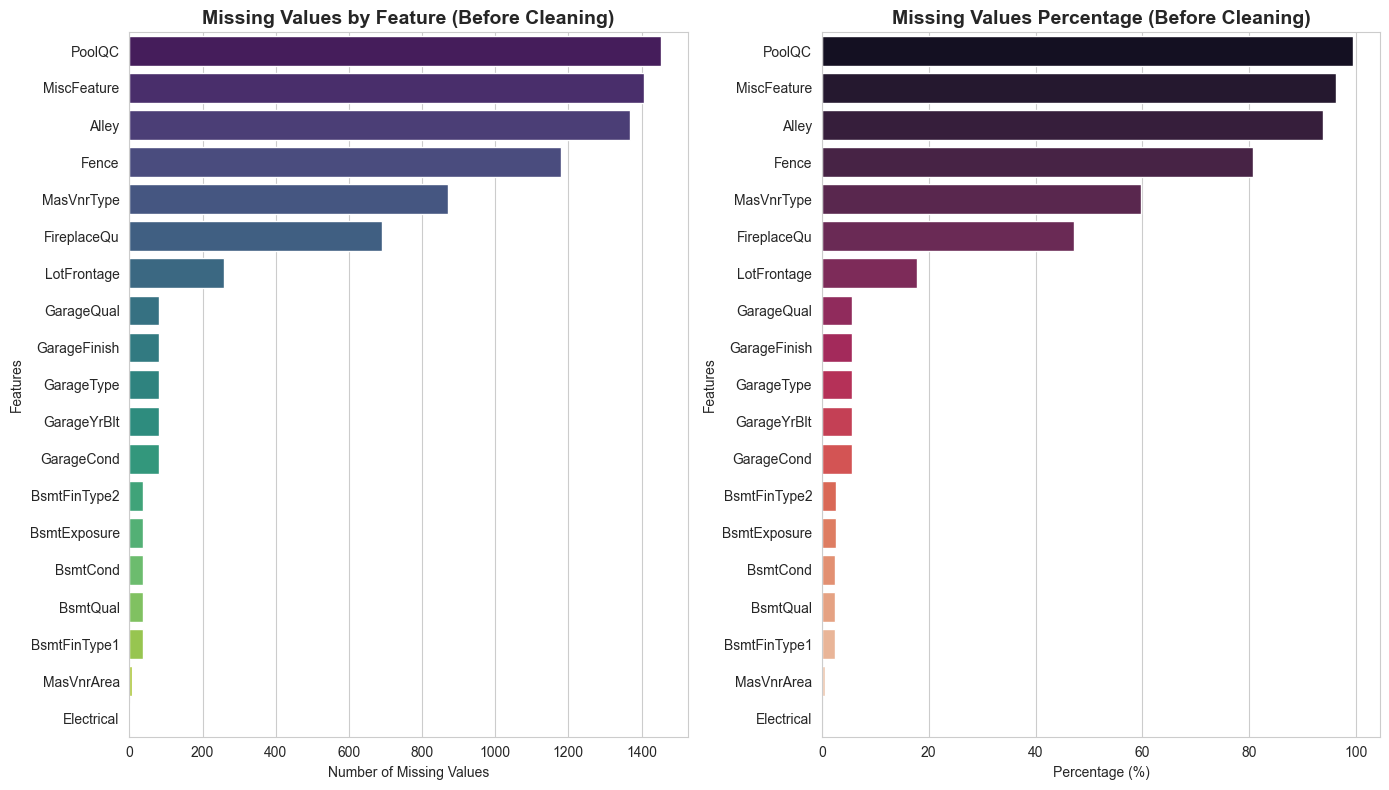

Total features with missing data: 19
Total missing values: 7829


In [1187]:
# 1. Missing Values Heatmap (Before Cleaning)
plt.figure(figsize=(14, 8))
missing_data = df_train.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]

plt.subplot(1, 2, 1)
sns.barplot(x=missing_data.values, y=missing_data.index, palette='viridis')
plt.title('Missing Values by Feature (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Missing Values')
plt.ylabel('Features')

plt.subplot(1, 2, 2)
missing_percent = (df_train.isnull().sum() / len(df_train) * 100).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]
sns.barplot(x=missing_percent.values, y=missing_percent.index, palette='rocket')
plt.title('Missing Values Percentage (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Percentage (%)')
plt.ylabel('Features')

plt.tight_layout()
plt.show()

print(f"Total features with missing data: {len(missing_data)}")
print(f"Total missing values: {df_train.isnull().sum().sum()}")

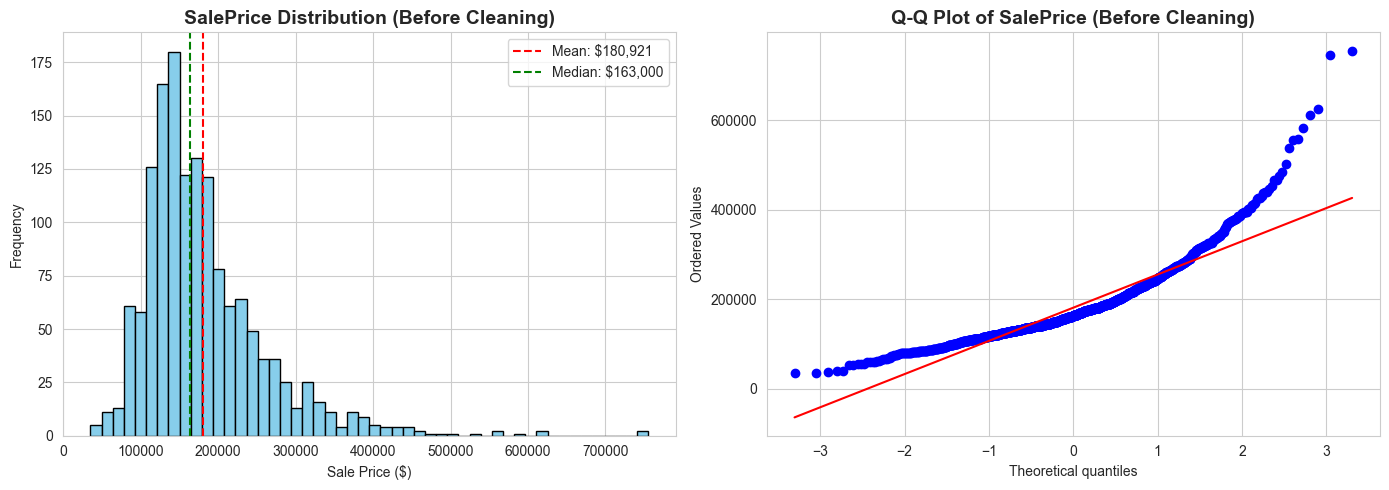

Mean: $180,921.20
Median: $163,000.00
Std Dev: $79,442.50
Skewness: 1.883


In [1188]:
# 2. Target Variable Distribution (Before Cleaning)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df_train['SalePrice'], bins=50, color='skyblue', edgecolor='black')
plt.title('SalePrice Distribution (Before Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.axvline(df_train['SalePrice'].mean(), color='red', linestyle='--', label=f'Mean: ${df_train["SalePrice"].mean():,.0f}')
plt.axvline(df_train['SalePrice'].median(), color='green', linestyle='--', label=f'Median: ${df_train["SalePrice"].median():,.0f}')
plt.legend()

plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(df_train['SalePrice'], dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice (Before Cleaning)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Mean: ${df_train['SalePrice'].mean():,.2f}")
print(f"Median: ${df_train['SalePrice'].median():,.2f}")
print(f"Std Dev: ${df_train['SalePrice'].std():,.2f}")
print(f"Skewness: {df_train['SalePrice'].skew():.3f}")

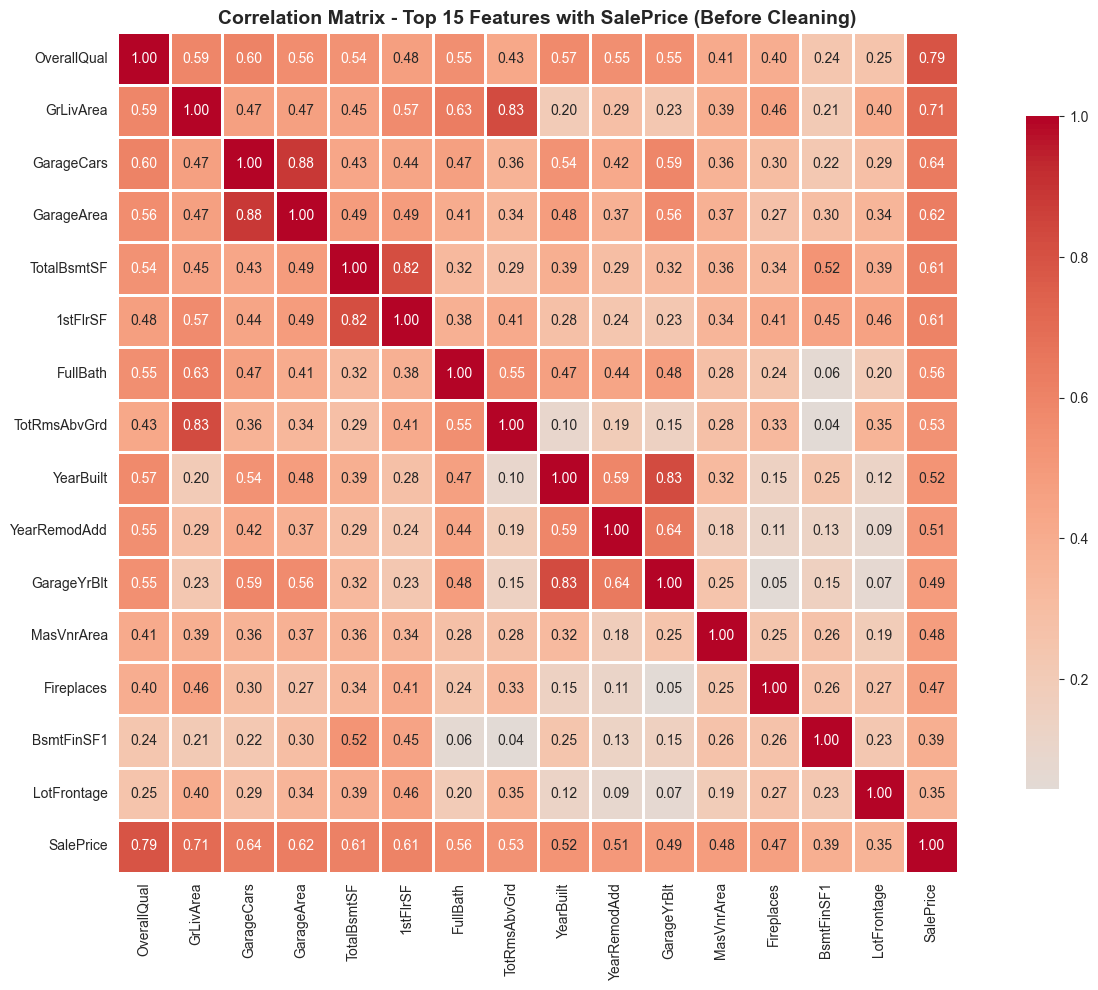

Top 10 features correlated with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [1189]:
# 3. Correlation Heatmap (Before Cleaning - Top Features)
plt.figure(figsize=(14, 10))
numerical_features = df_train.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df_train[numerical_features].corr()

# Get top 15 features most correlated with SalePrice
top_features = corr_matrix['SalePrice'].abs().sort_values(ascending=False)[1:16].index
top_corr = df_train[list(top_features) + ['SalePrice']].corr()

sns.heatmap(top_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Top 15 Features with SalePrice (Before Cleaning)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Top 10 features correlated with SalePrice:")
print(corr_matrix['SalePrice'].sort_values(ascending=False)[1:11])

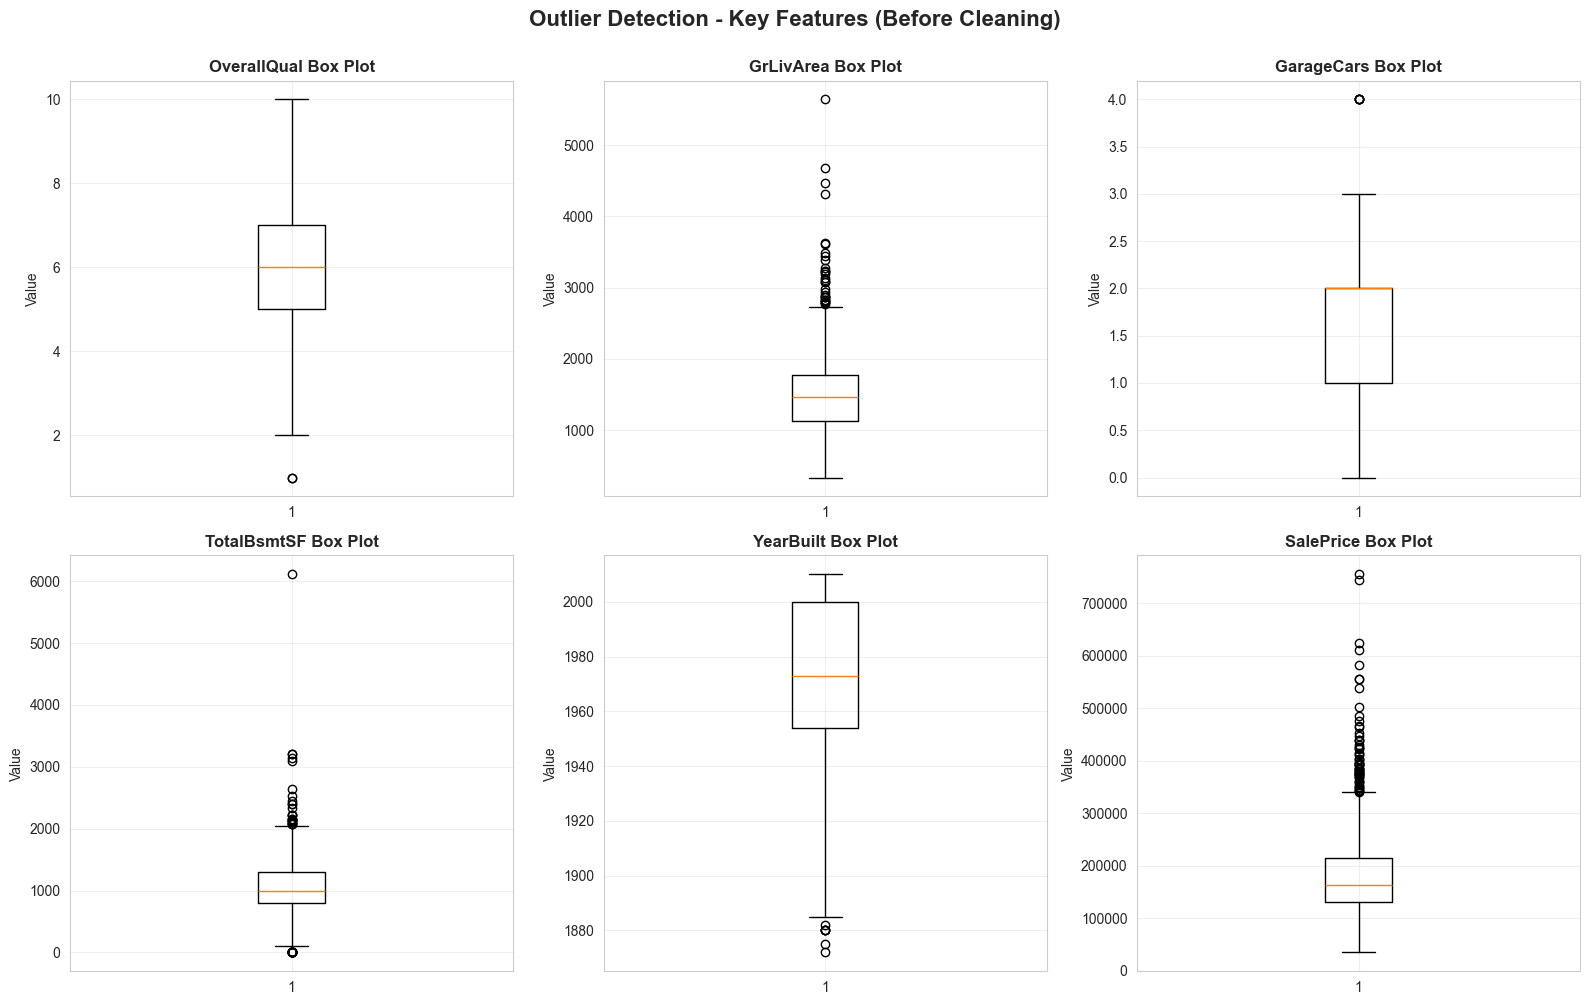

In [1190]:
# 4. Outlier Detection Box Plots (Before Cleaning)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
important_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', 'SalePrice']

for idx, feature in enumerate(important_features):
    row = idx // 3
    col = idx % 3
    axes[row, col].boxplot(df_train[feature].dropna(), vert=True)
    axes[row, col].set_title(f'{feature} Box Plot', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Value')
    axes[row, col].grid(True, alpha=0.3)

plt.suptitle('Outlier Detection - Key Features (Before Cleaning)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

In [1191]:
# Step 1: Inspect missing values
print(df_train.isnull().sum().sort_values(ascending=False))
print(f"\nMissing value percentages:\n{(df_train.isnull().sum()/len(df_train)*100).sort_values(ascending=False)}")

# Step 2: Handle missing values
# Drop columns with >50% missing data
threshold = 0.5
missing_cols = df_train.columns[df_train.isnull().mean() > threshold]
df_train_clean = df_train.drop(columns=missing_cols)
df_test_clean = df_test.drop(columns=missing_cols)

# Separate numerical and categorical columns
numerical_cols = df_train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train_clean.select_dtypes(include=['object']).columns.tolist()

# Remove target from numerical columns if present
if 'SalePrice' in numerical_cols:
    numerical_cols.remove('SalePrice')
if 'Id' in numerical_cols:
    numerical_cols.remove('Id')

# Impute numerical features with median
from sklearn.impute import SimpleImputer
num_imputer = SimpleImputer(strategy='median')
df_train_clean[numerical_cols] = num_imputer.fit_transform(df_train_clean[numerical_cols])
df_test_clean[numerical_cols] = num_imputer.transform(df_test_clean[numerical_cols])

# Impute categorical features with most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df_train_clean[categorical_cols] = cat_imputer.fit_transform(df_train_clean[categorical_cols])
df_test_clean[categorical_cols] = cat_imputer.transform(df_test_clean[categorical_cols])

# Step 3: Handle outliers in target variable (SalePrice)
Q1 = df_train_clean['SalePrice'].quantile(0.25)
Q3 = df_train_clean['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR
df_train_clean = df_train_clean[(df_train_clean['SalePrice'] >= lower_bound) & 
                                 (df_train_clean['SalePrice'] <= upper_bound)]

# Step 4: Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
train_encoded = encoder.fit_transform(df_train_clean[categorical_cols])
test_encoded = encoder.transform(df_test_clean[categorical_cols])

# Create encoded dataframes
train_encoded_df = pd.DataFrame(train_encoded, 
                                columns=encoder.get_feature_names_out(categorical_cols),
                                index=df_train_clean.index)
test_encoded_df = pd.DataFrame(test_encoded, 
                               columns=encoder.get_feature_names_out(categorical_cols),
                               index=df_test_clean.index)

# Combine with numerical features
X_train = pd.concat([df_train_clean[numerical_cols].reset_index(drop=True), 
                     train_encoded_df.reset_index(drop=True)], axis=1)
X_test = pd.concat([df_test_clean[numerical_cols].reset_index(drop=True), 
                    test_encoded_df.reset_index(drop=True)], axis=1)
y_train = df_train_clean['SalePrice'].reset_index(drop=True)

# Step 5: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f"\nCleaned training data shape: {X_train_scaled.shape}")
print(f"Cleaned test data shape: {X_test_scaled.shape}")
print(f"Target variable shape: {y_train.shape}")

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 81, dtype: int64

Missing value percentages:
PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

Cleaned training data shape: (1448, 233)
Cleaned test data shape: (1459, 233)
Target variable shape: (1448,)


In [1192]:
# ===== ADVANCED DATA PREPROCESSING =====
print("="*60)
print("ADVANCED DATA PREPROCESSING")
print("="*60)

# 1. Handle skewed features
from scipy.stats import skew
skewed_features = X_train.select_dtypes(include=['float64', 'int64']).apply(lambda x: skew(x))
skewed_features = skewed_features[abs(skewed_features) > 0.75]

print(f"\n1. Skewness Correction:")
print(f"   Found {len(skewed_features)} highly skewed features")

for feature in skewed_features.index:
    if feature in X_train_scaled.columns:
        X_train_scaled[feature] = np.log1p(X_train[feature])
        X_test_scaled[feature] = np.log1p(X_test[feature])

# 2. Remove multicollinear features
corr_matrix = X_train_scaled.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

print(f"\n3. Multicollinearity Removal:")
print(f"   Dropping {len(to_drop)} highly correlated features")

X_train_scaled = X_train_scaled.drop(columns=to_drop)
X_test_scaled = X_test_scaled.drop(columns=to_drop)

# 3. Log transform target
y_train_log = np.log1p(y_train)

# 4. Final train-validation split
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train_log, test_size=0.2, random_state=42
)

# Keep original target for later comparison
_, _, y_train_final_orig, y_val_orig = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Summary
print("\n" + "="*60)
print("FINAL DATASET SUMMARY")
print("="*60)
print(f"Training samples: {X_train_final.shape[0]}")
print(f"Validation samples: {X_val.shape[0]}")
print(f"Test samples: {X_test_scaled.shape[0]}")
print(f"Total features: {X_train_final.shape[1]}")
print(f"Target variable: Log-transformed SalePrice")
print(f"Target skewness (original): {y_train.skew():.3f}")
print(f"Target skewness (log): {y_train_log.skew():.3f}")
print("="*60)

ADVANCED DATA PREPROCESSING

1. Skewness Correction:
   Found 204 highly skewed features

3. Multicollinearity Removal:
   Dropping 7 highly correlated features

FINAL DATASET SUMMARY
Training samples: 1158
Validation samples: 290
Test samples: 1459
Total features: 226
Target variable: Log-transformed SalePrice
Target skewness (original): 1.145
Target skewness (log): -0.065

3. Multicollinearity Removal:
   Dropping 7 highly correlated features

FINAL DATASET SUMMARY
Training samples: 1158
Validation samples: 290
Test samples: 1459
Total features: 226
Target variable: Log-transformed SalePrice
Target skewness (original): 1.145
Target skewness (log): -0.065


## Data Cleaning Process

In [1193]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

## Data Visualization: After Cleaning

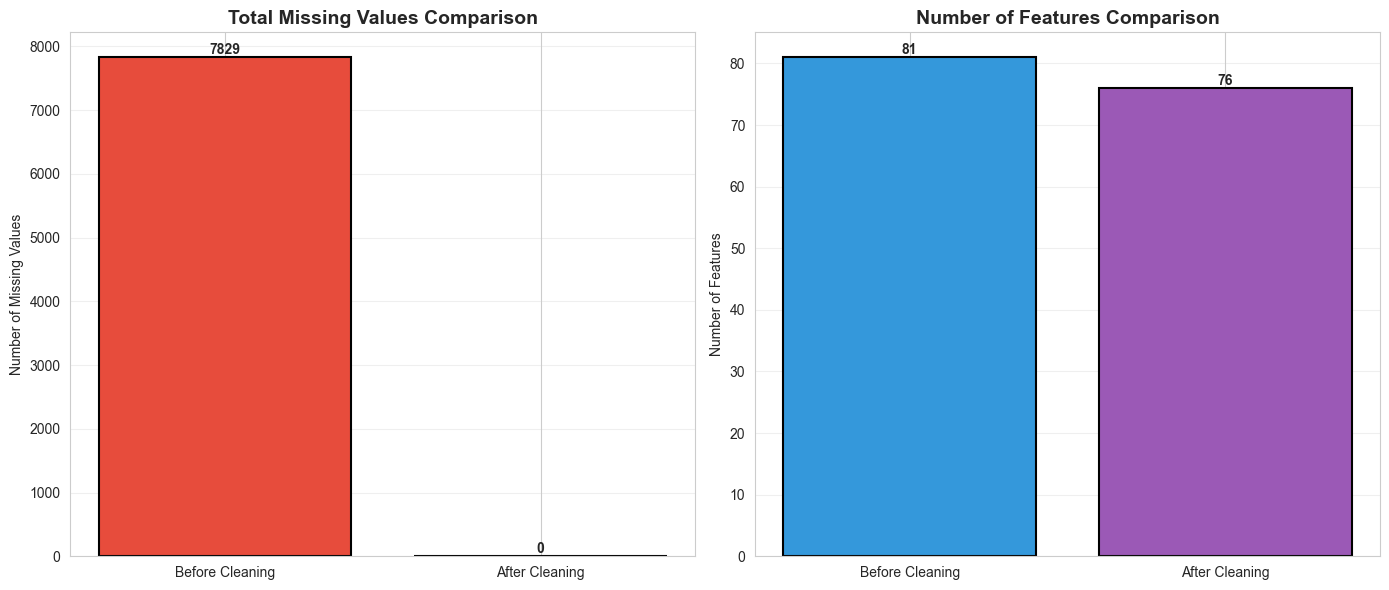

Missing values removed: 7829
Features dropped: 5
Columns dropped: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


In [1194]:
# 1. Missing Values After Cleaning
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
missing_after = df_train_clean.isnull().sum().sum()
missing_before = df_train.isnull().sum().sum()
bars = plt.bar(['Before Cleaning', 'After Cleaning'], [missing_before, missing_after], 
               color=['#e74c3c', '#2ecc71'], edgecolor='black', linewidth=1.5)
plt.title('Total Missing Values Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
features_before = len(df_train.columns)
features_after = len(df_train_clean.columns)
bars = plt.bar(['Before Cleaning', 'After Cleaning'], [features_before, features_after],
               color=['#3498db', '#9b59b6'], edgecolor='black', linewidth=1.5)
plt.title('Number of Features Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Number of Features')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Missing values removed: {missing_before - missing_after}")
print(f"Features dropped: {features_before - features_after}")
print(f"Columns dropped: {list(missing_cols)}")

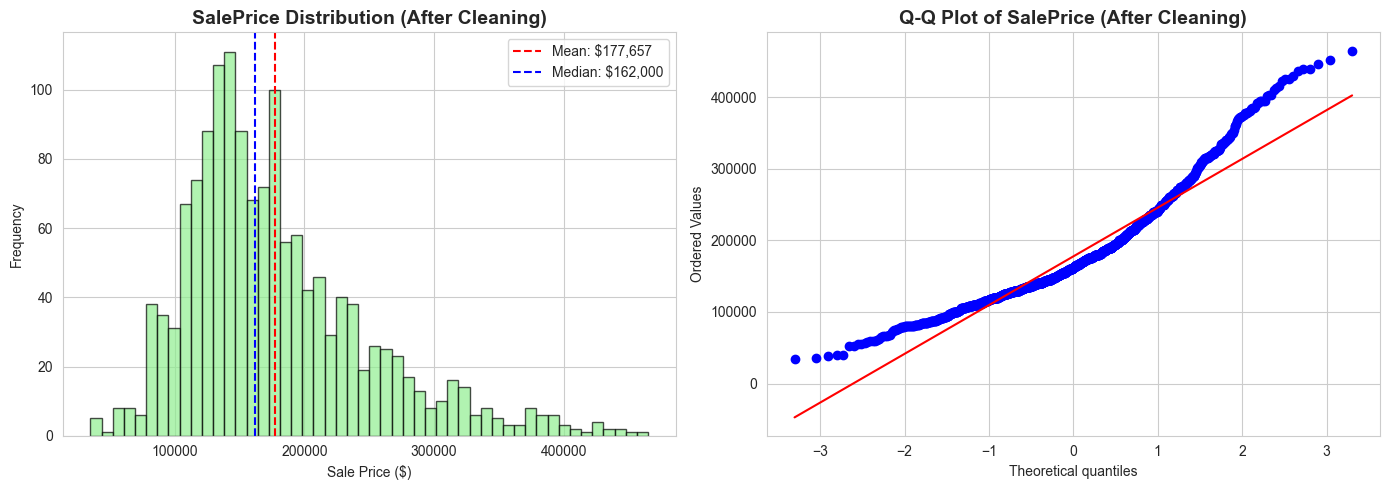

Mean: $177,657.07
Median: $162,000.00
Std Dev: $70,678.08
Skewness: 1.145
Samples removed: 12


In [1195]:
# 2. Target Variable Distribution After Outlier Removal
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(y_train, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('SalePrice Distribution (After Cleaning)', fontsize=14, fontweight='bold')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')
plt.axvline(y_train.mean(), color='red', linestyle='--', label=f'Mean: ${y_train.mean():,.0f}')
plt.axvline(y_train.median(), color='blue', linestyle='--', label=f'Median: ${y_train.median():,.0f}')
plt.legend()

plt.subplot(1, 2, 2)
from scipy import stats
stats.probplot(y_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of SalePrice (After Cleaning)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Mean: ${y_train.mean():,.2f}")
print(f"Median: ${y_train.median():,.2f}")
print(f"Std Dev: ${y_train.std():,.2f}")
print(f"Skewness: {y_train.skew():.3f}")
print(f"Samples removed: {len(df_train) - len(y_train)}")

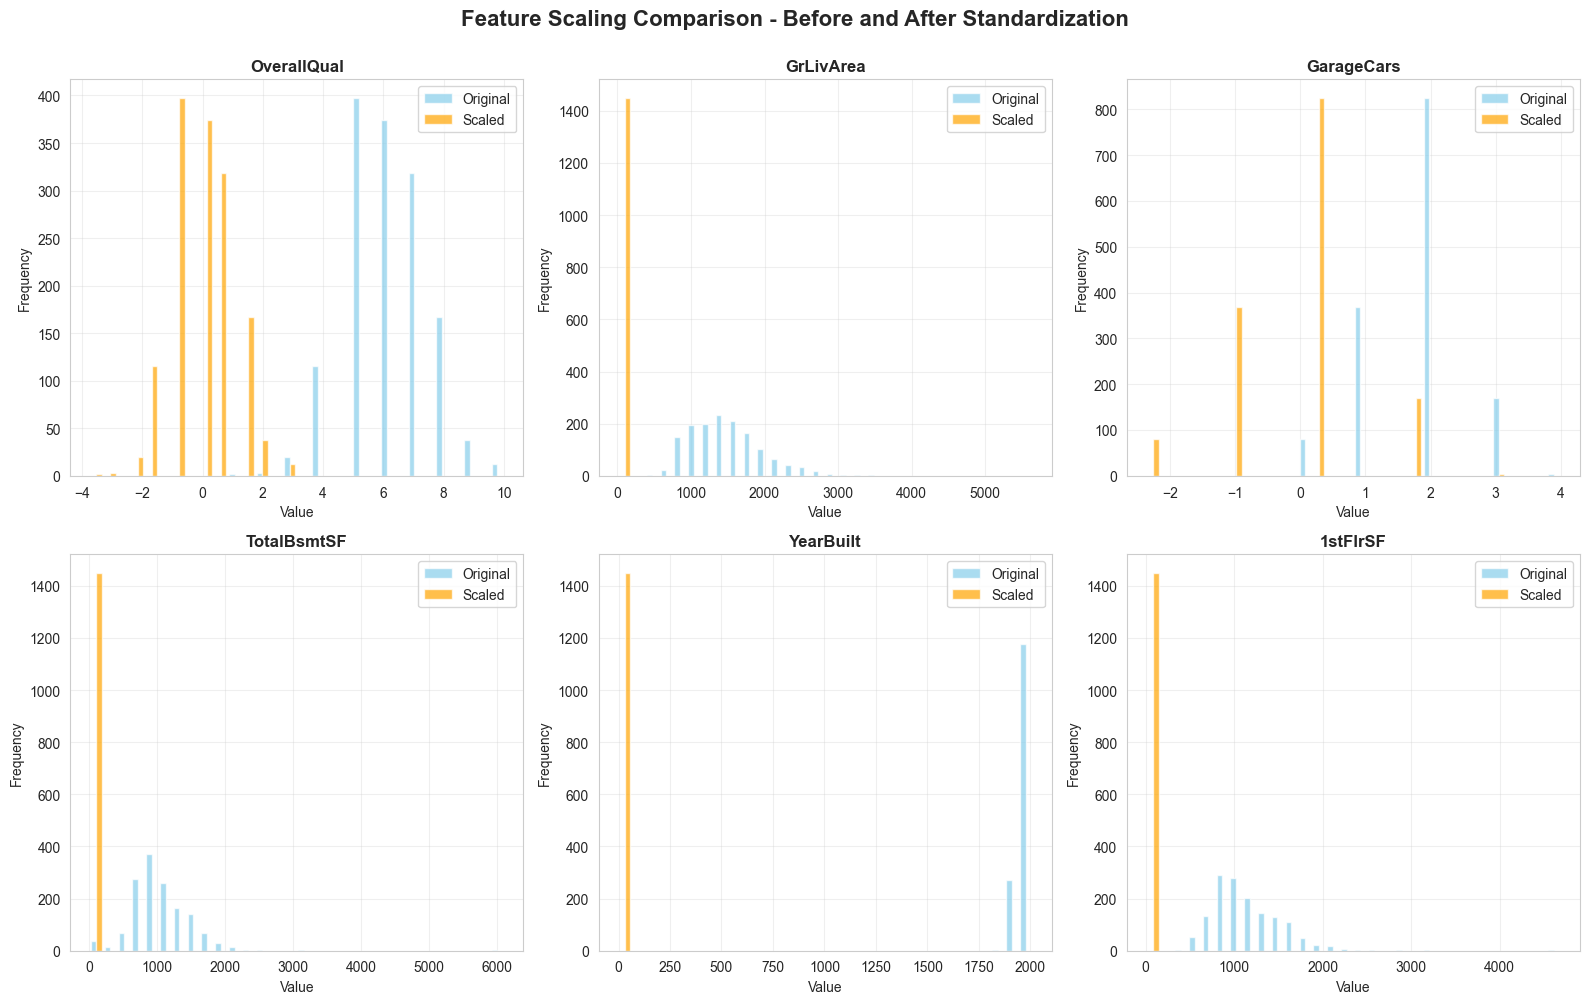

In [1196]:
# 3. Feature Scaling Comparison (Before and After)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Select 6 important numerical features
sample_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt', '1stFlrSF']
available_features = [f for f in sample_features if f in numerical_cols][:6]

for idx, feature in enumerate(available_features):
    row = idx // 3
    col = idx % 3
    
    # Get original and scaled values
    original_values = df_train_clean[feature].values
    feature_idx = list(X_train.columns).index(feature)
    scaled_values = X_train_scaled.iloc[:, feature_idx].values
    
    axes[row, col].hist([original_values, scaled_values], bins=30, 
                        label=['Original', 'Scaled'], alpha=0.7, color=['skyblue', 'orange'])
    axes[row, col].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Value')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()
    axes[row, col].grid(True, alpha=0.3)

plt.suptitle('Feature Scaling Comparison - Before and After Standardization', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

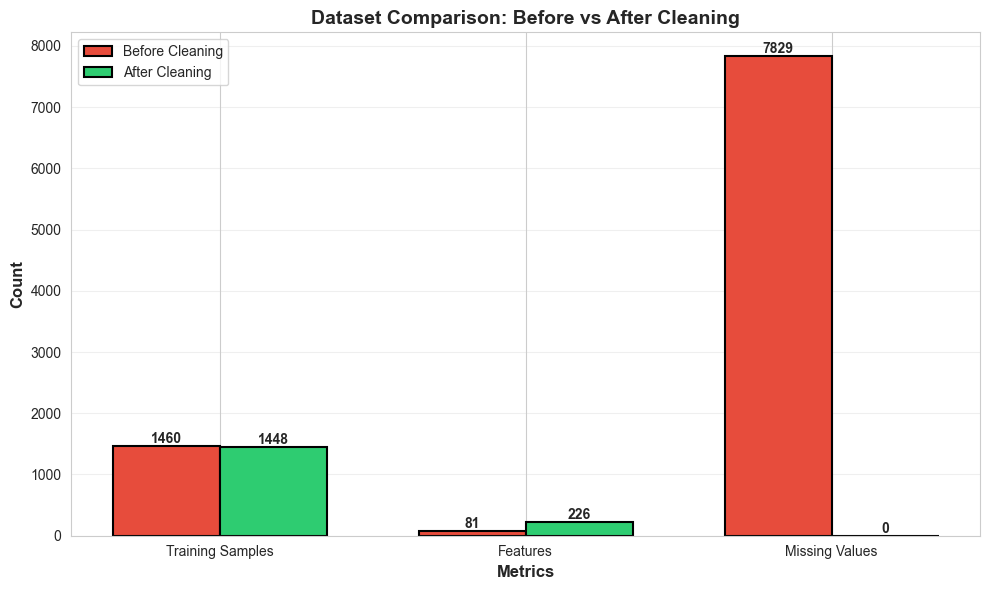


SUMMARY OF DATA CLEANING
Original dataset size: 1460 samples, 81 features
Cleaned dataset size: 1448 samples, 226 features
Samples removed: 12
Features added (one-hot encoding): 145
Missing values before: 7829
Missing values after: 0


In [1197]:
# 4. Dataset Size Comparison
plt.figure(figsize=(10, 6))

categories = ['Training Samples', 'Features', 'Missing Values']
before_values = [len(df_train), len(df_train.columns), df_train.isnull().sum().sum()]
after_values = [len(X_train_scaled), len(X_train_scaled.columns), X_train_scaled.isnull().sum().sum()]

x = np.arange(len(categories))
width = 0.35

bars1 = plt.bar(x - width/2, before_values, width, label='Before Cleaning', 
                color='#e74c3c', edgecolor='black', linewidth=1.5)
bars2 = plt.bar(x + width/2, after_values, width, label='After Cleaning', 
                color='#2ecc71', edgecolor='black', linewidth=1.5)

plt.xlabel('Metrics', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.title('Dataset Comparison: Before vs After Cleaning', fontsize=14, fontweight='bold')
plt.xticks(x, categories)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("SUMMARY OF DATA CLEANING")
print("="*50)
print(f"Original dataset size: {len(df_train)} samples, {len(df_train.columns)} features")
print(f"Cleaned dataset size: {len(X_train_scaled)} samples, {len(X_train_scaled.columns)} features")
print(f"Samples removed: {len(df_train) - len(X_train_scaled)}")
print(f"Features added (one-hot encoding): {len(X_train_scaled.columns) - len(df_train.columns)}")
print(f"Missing values before: {df_train.isnull().sum().sum()}")
print(f"Missing values after: {X_train_scaled.isnull().sum().sum()}")
print("="*50)

## End of Data Cleaning
- Initialized Kaggle housing training and test datasets.
- Dropped features that are missing a signifigant amount of data (over 50%).
- For features with missing data within the threshold, empty datapoints were filled in using SkLearn's `SimpleImputer` statistical analysis class. Numerical features had missing data points inferred by the median of their feature, while catagorical features had their data points inferred by the most frequent value.
- Outliers over 75% or under 25% for each feature were scrubbed.
- Categorical features were separated, encoded using SkLearn's `OneHotEncoding` class, and reincorporated into the dataset.
- All features were scaled using SkLearn's `StandardScalar` class.
- Remaining skewed features had a log transform applied.
- Features with a high correlation to one another were removed to reduce complexity in the dataset where possible.

## Linear Regression

In [1198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Using standard LinearRegression for more stable and interpretable results
# This solves the normal equations directly (closed-form solution)

# Initialize model
linear_model = LinearRegression()

print("="*60)
print("LINEAR REGRESSION MODEL")
print("="*60)
print("\nTraining model...")

# Train the model
linear_model.fit(X_train_final, y_train_final)

print("\n✓ Training complete!")
print(f"Number of features used: {linear_model.n_features_in_}")
print(f"Intercept: {linear_model.intercept_:.4f}")
print(f"Coefficients shape: {linear_model.coef_.shape}")

LINEAR REGRESSION MODEL

Training model...

✓ Training complete!
Number of features used: 226
Intercept: 5.6104
Coefficients shape: (226,)


In [1199]:
# Make predictions
y_train_pred = linear_model.predict(X_train_final)
y_val_pred = linear_model.predict(X_val)

# Check for extreme predictions
print("Prediction statistics:")
print(f"Training predictions - Min: {y_train_pred.min():.4f}, Max: {y_train_pred.max():.4f}, Mean: {y_train_pred.mean():.4f}")
print(f"Validation predictions - Min: {y_val_pred.min():.4f}, Max: {y_val_pred.max():.4f}, Mean: {y_val_pred.mean():.4f}")
print(f"Training actual - Min: {y_train_final.min():.4f}, Max: {y_train_final.max():.4f}, Mean: {y_train_final.mean():.4f}")
print(f"Validation actual - Min: {y_val.min():.4f}, Max: {y_val.max():.4f}, Mean: {y_val.mean():.4f}")

# Calculate metrics on log-scale
train_mse = mean_squared_error(y_train_final, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_final, y_train_pred)
train_r2 = r2_score(y_train_final, y_train_pred)

val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Display results
print("\n" + "="*60)
print("LINEAR REGRESSION MODEL PERFORMANCE (Log-Scale)")
print("="*60)
print("\nTraining Metrics:")
print(f"  MSE:  {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

print("\nValidation Metrics:")
print(f"  MSE:  {val_mse:.4f}")
print(f"  RMSE: {val_rmse:.4f}")
print(f"  MAE:  {val_mae:.4f}")
print(f"  R²:   {val_r2:.4f}")

# Convert predictions back to original scale (NO CLIPPING NEEDED)
y_train_pred_original = np.expm1(y_train_pred)  # Don't clip!
y_val_pred_original = np.expm1(y_val_pred)
y_train_original = np.expm1(y_train_final)
y_val_original = np.expm1(y_val)

print("\n" + "="*60)
print("PERFORMANCE IN ORIGINAL PRICE SCALE ($)")
print("="*60)
try:
    train_rmse_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))
    train_mae_original = mean_absolute_error(y_train_original, y_train_pred_original)
    train_r2_original = r2_score(y_train_original, y_train_pred_original)
    
    val_rmse_original = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
    val_mae_original = mean_absolute_error(y_val_original, y_val_pred_original)
    val_r2_original = r2_score(y_val_original, y_val_pred_original)
    
    print("\nTraining Metrics:")
    print(f"  RMSE: ${train_rmse_original:,.2f}")
    print(f"  MAE:  ${train_mae_original:,.2f}")
    print(f"  R²:   {train_r2_original:.4f}")
    
    print("\nValidation Metrics:")
    print(f"  RMSE: ${val_rmse_original:,.2f}")
    print(f"  MAE:  ${val_mae_original:,.2f}")
    print(f"  R²:   {val_r2_original:.4f}")
except (ValueError, OverflowError) as e:
    print(f"\n⚠️  Unable to compute original scale metrics: {str(e)}")
    print("This may indicate extreme predictions.")
print("="*60)

Prediction statistics:
Training predictions - Min: 10.5871, Max: 12.9896, Mean: 12.0299
Validation predictions - Min: 11.0158, Max: 12.9623, Mean: 11.9604
Training actual - Min: 10.4603, Max: 13.0498, Mean: 12.0299
Validation actual - Min: 10.5967, Max: 12.9918, Mean: 11.9500

LINEAR REGRESSION MODEL PERFORMANCE (Log-Scale)

Training Metrics:
  MSE:  0.0078
  RMSE: 0.0884
  MAE:  0.0619
  R²:   0.9493

Validation Metrics:
  MSE:  0.0156
  RMSE: 0.1249
  MAE:  0.0873
  R²:   0.8695

PERFORMANCE IN ORIGINAL PRICE SCALE ($)

Training Metrics:
  RMSE: $16,731.79
  MAE:  $10,917.53
  R²:   0.9473

Validation Metrics:
  RMSE: $19,179.33
  MAE:  $13,664.94
  R²:   0.8946

Training predictions - Min: 10.5871, Max: 12.9896, Mean: 12.0299
Validation predictions - Min: 11.0158, Max: 12.9623, Mean: 11.9604
Training actual - Min: 10.4603, Max: 13.0498, Mean: 12.0299
Validation actual - Min: 10.5967, Max: 12.9918, Mean: 11.9500

LINEAR REGRESSION MODEL PERFORMANCE (Log-Scale)

Training Metrics:
  MS

In [1200]:
# For loss tracking, we'll use SGDRegressor with better hyperparameters
# This is separate from the main LinearRegression model above
from sklearn.linear_model import SGDRegressor

# Create a model specifically for tracking loss during training
sgd_model = SGDRegressor(
    loss='squared_error',
    penalty='l2',
    alpha=0.0001,
    max_iter=1,  # We'll train incrementally
    learning_rate='constant',
    eta0=0.001,  # Lower learning rate for stability
    random_state=42,
    warm_start=True,  # Allow incremental training
    tol=None  # Don't stop early
)

# Track losses
train_losses = []
val_losses = []
epochs = 100

print("\n" + "="*60)
print("TRAINING SGD MODEL FOR LOSS VISUALIZATION")
print("="*60)
print("\nTraining with loss tracking...")

for epoch in range(epochs):
    # Train on training data
    sgd_model.partial_fit(X_train_final, y_train_final)
    
    # Calculate losses
    train_pred = sgd_model.predict(X_train_final)
    val_pred = sgd_model.predict(X_val)
    
    train_loss = mean_squared_error(y_train_final, train_pred)
    val_loss = mean_squared_error(y_val, val_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    if (epoch + 1) % 20 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

print("\n✓ Training with loss tracking complete!")
print(f"Final Train Loss: {train_losses[-1]:.4f}")
print(f"Final Val Loss: {val_losses[-1]:.4f}")
print("="*60)


TRAINING SGD MODEL FOR LOSS VISUALIZATION

Training with loss tracking...
Epoch 20/100 - Train Loss: 0.0311, Val Loss: 0.0351
Epoch 20/100 - Train Loss: 0.0311, Val Loss: 0.0351
Epoch 40/100 - Train Loss: 0.0263, Val Loss: 0.0306
Epoch 40/100 - Train Loss: 0.0263, Val Loss: 0.0306
Epoch 60/100 - Train Loss: 0.0242, Val Loss: 0.0291
Epoch 60/100 - Train Loss: 0.0242, Val Loss: 0.0291
Epoch 80/100 - Train Loss: 0.0229, Val Loss: 0.0284
Epoch 80/100 - Train Loss: 0.0229, Val Loss: 0.0284
Epoch 100/100 - Train Loss: 0.0220, Val Loss: 0.0279

✓ Training with loss tracking complete!
Final Train Loss: 0.0220
Final Val Loss: 0.0279
Epoch 100/100 - Train Loss: 0.0220, Val Loss: 0.0279

✓ Training with loss tracking complete!
Final Train Loss: 0.0220
Final Val Loss: 0.0279


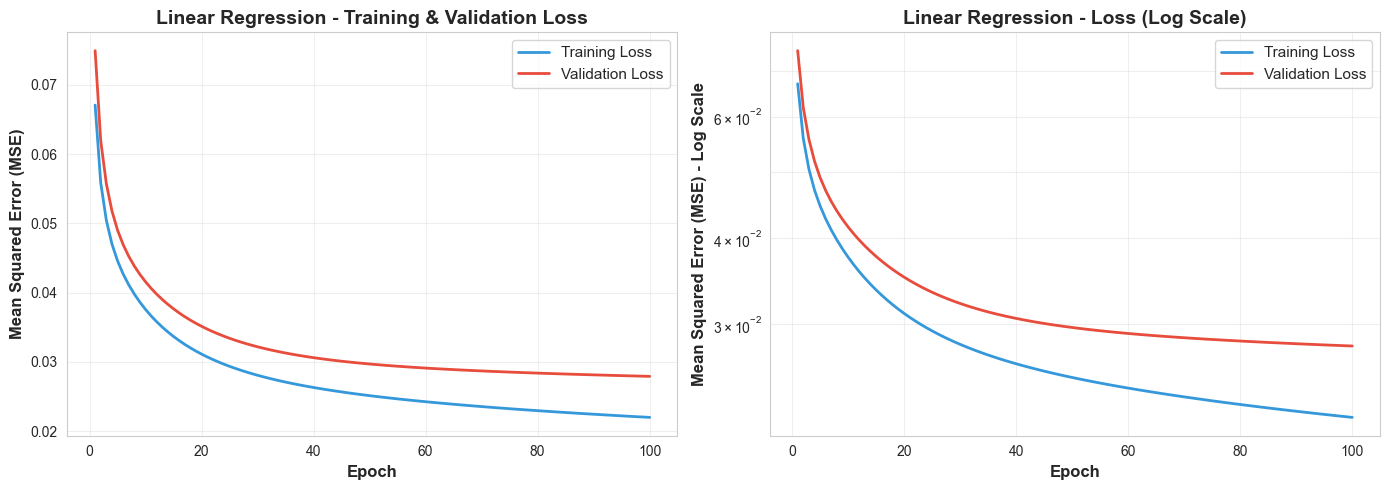


Final Training Loss: 0.0220
Final Validation Loss: 0.0279
Loss Difference: 0.0059

⚠️  Model may be overfitting (validation loss >> training loss)


In [1201]:
# Plot the loss curves
plt.figure(figsize=(14, 5))

# Plot 1: Loss over epochs
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', linewidth=2, color='#3498db')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', linewidth=2, color='#e74c3c')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE)', fontsize=12, fontweight='bold')
plt.title('Linear Regression - Training & Validation Loss', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Plot 2: Loss over epochs (Log scale for better visibility)
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss', linewidth=2, color='#3498db')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', linewidth=2, color='#e74c3c')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Mean Squared Error (MSE) - Log Scale', fontsize=12, fontweight='bold')
plt.title('Linear Regression - Loss (Log Scale)', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

# Print final losses
print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Loss Difference: {abs(val_losses[-1] - train_losses[-1]):.4f}")

if val_losses[-1] > train_losses[-1] * 1.2:
    print("\n⚠️  Model may be overfitting (validation loss >> training loss)")
elif train_losses[-1] > 0.1:
    print("\n⚠️  Model may be underfitting (high training loss)")
else:
    print("\n✓ Model converged well!")

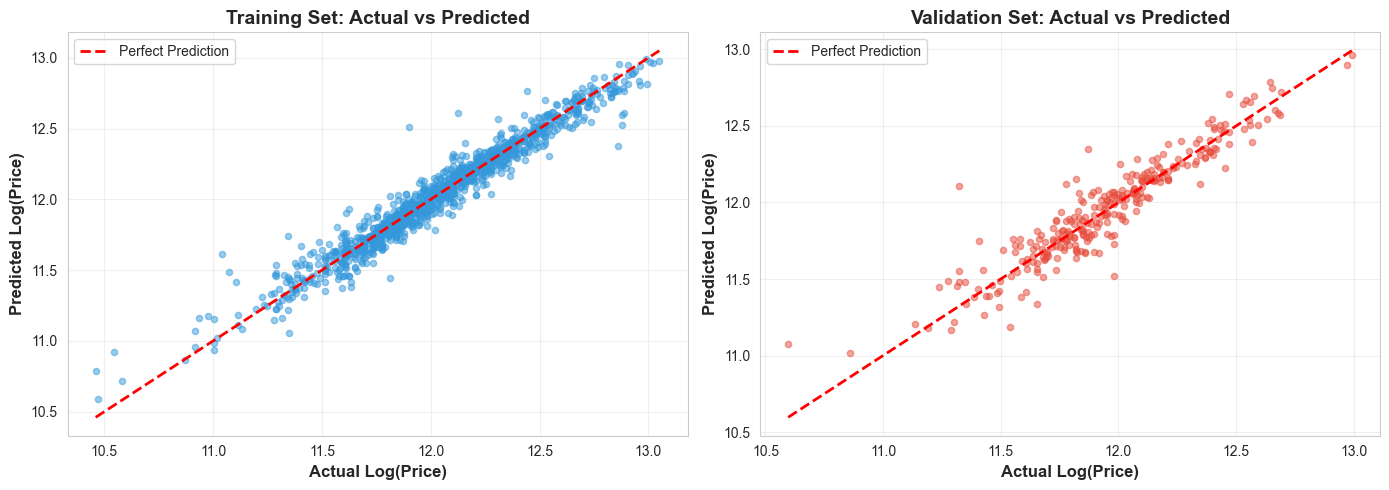


Linear Regression Model Performance:
Training R²: 0.9493
Validation R²: 0.8695


In [1202]:
# Additional visualizations: Predictions vs Actual
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Use the main LinearRegression model for predictions
y_train_pred_final = linear_model.predict(X_train_final)
y_val_pred_final = linear_model.predict(X_val)

# Training set predictions
axes[0].scatter(y_train_final, y_train_pred_final, alpha=0.5, s=20, color='#3498db')
axes[0].plot([y_train_final.min(), y_train_final.max()], 
             [y_train_final.min(), y_train_final.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Price)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Log(Price)', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set predictions
axes[1].scatter(y_val, y_val_pred_final, alpha=0.5, s=20, color='#e74c3c')
axes[1].plot([y_val.min(), y_val.max()], 
             [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Price)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Log(Price)', fontsize=12, fontweight='bold')
axes[1].set_title('Validation Set: Actual vs Predicted', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate R² for the main model
train_r2_final = r2_score(y_train_final, y_train_pred_final)
val_r2_final = r2_score(y_val, y_val_pred_final)

print(f"\nLinear Regression Model Performance:")
print(f"Training R²: {train_r2_final:.4f}")
print(f"Validation R²: {val_r2_final:.4f}")

## End of Linear Regression
- Very good performance, with strong linear correlation showing between features.
- Best performance was achieved with an "L2" regularizer and an initial learning rate of 0.01.
- Validation loss versus training loss shows that overfitting is likely occuring.

## Polynomial Regression

In [1203]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features (degree 2)
# Note: We use a subset of features to avoid memory issues with too many polynomial combinations
print("="*60)
print("POLYNOMIAL REGRESSION MODEL (Degree 2)")
print("="*60)
print("\nGenerating polynomial features...")

# Use degree 2 polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_final)
X_val_poly = poly.transform(X_val)

print(f"Original features: {X_train_final.shape[1]}")
print(f"Polynomial features: {X_train_poly.shape[1]}")
print(f"Feature expansion: {X_train_poly.shape[1] / X_train_final.shape[1]:.2f}x")

# Initialize and train polynomial regression model
poly_model = LinearRegression()

print("\nTraining polynomial regression model...")
poly_model.fit(X_train_poly, y_train_final)

print("✓ Training complete!")
print(f"Number of features used: {poly_model.n_features_in_}")
print(f"Intercept: {poly_model.intercept_:.4f}")

POLYNOMIAL REGRESSION MODEL (Degree 2)

Generating polynomial features...


Original features: 226
Polynomial features: 25877
Feature expansion: 114.50x

Training polynomial regression model...
✓ Training complete!
Number of features used: 25877
Intercept: 9.8108
✓ Training complete!
Number of features used: 25877
Intercept: 9.8108


In [1204]:
# Make predictions
y_train_pred_poly = poly_model.predict(X_train_poly)
y_val_pred_poly = poly_model.predict(X_val_poly)

# Check for extreme predictions
print("\nPrediction statistics:")
print(f"Training predictions - Min: {y_train_pred_poly.min():.4f}, Max: {y_train_pred_poly.max():.4f}, Mean: {y_train_pred_poly.mean():.4f}")
print(f"Validation predictions - Min: {y_val_pred_poly.min():.4f}, Max: {y_val_pred_poly.max():.4f}, Mean: {y_val_pred_poly.mean():.4f}")

# Calculate metrics on log-scale
train_mse_poly = mean_squared_error(y_train_final, y_train_pred_poly)
train_rmse_poly = np.sqrt(train_mse_poly)
train_mae_poly = mean_absolute_error(y_train_final, y_train_pred_poly)
train_r2_poly = r2_score(y_train_final, y_train_pred_poly)

val_mse_poly = mean_squared_error(y_val, y_val_pred_poly)
val_rmse_poly = np.sqrt(val_mse_poly)
val_mae_poly = mean_absolute_error(y_val, y_val_pred_poly)
val_r2_poly = r2_score(y_val, y_val_pred_poly)

# Display results
print("\n" + "="*60)
print("POLYNOMIAL REGRESSION MODEL PERFORMANCE (Log-Scale)")
print("="*60)
print("\nTraining Metrics:")
print(f"  MSE:  {train_mse_poly:.4f}")
print(f"  RMSE: {train_rmse_poly:.4f}")
print(f"  MAE:  {train_mae_poly:.4f}")
print(f"  R²:   {train_r2_poly:.4f}")

print("\nValidation Metrics:")
print(f"  MSE:  {val_mse_poly:.4f}")
print(f"  RMSE: {val_rmse_poly:.4f}")
print(f"  MAE:  {val_mae_poly:.4f}")
print(f"  R²:   {val_r2_poly:.4f}")

# Convert predictions back to original scale
y_train_pred_poly_original = np.expm1(y_train_pred_poly)
y_val_pred_poly_original = np.expm1(y_val_pred_poly)
y_train_original = np.expm1(y_train_final)
y_val_original = np.expm1(y_val)

print("\n" + "="*60)
print("PERFORMANCE IN ORIGINAL PRICE SCALE ($)")
print("="*60)
try:
    train_rmse_poly_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_poly_original))
    train_mae_poly_original = mean_absolute_error(y_train_original, y_train_pred_poly_original)
    train_r2_poly_original = r2_score(y_train_original, y_train_pred_poly_original)
    
    val_rmse_poly_original = np.sqrt(mean_squared_error(y_val_original, y_val_pred_poly_original))
    val_mae_poly_original = mean_absolute_error(y_val_original, y_val_pred_poly_original)
    val_r2_poly_original = r2_score(y_val_original, y_val_pred_poly_original)
    
    print("\nTraining Metrics:")
    print(f"  RMSE: ${train_rmse_poly_original:,.2f}")
    print(f"  MAE:  ${train_mae_poly_original:,.2f}")
    print(f"  R²:   {train_r2_poly_original:.4f}")
    
    print("\nValidation Metrics:")
    print(f"  RMSE: ${val_rmse_poly_original:,.2f}")
    print(f"  MAE:  ${val_mae_poly_original:,.2f}")
    print(f"  R²:   {val_r2_poly_original:.4f}")
except (ValueError, OverflowError) as e:
    print(f"\n⚠️  Unable to compute original scale metrics: {str(e)}")
    print("This may indicate extreme predictions.")
print("="*60)


Prediction statistics:
Training predictions - Min: 10.4603, Max: 13.0498, Mean: 12.0299
Validation predictions - Min: 10.7880, Max: 12.8865, Mean: 11.9552

POLYNOMIAL REGRESSION MODEL PERFORMANCE (Log-Scale)

Training Metrics:
  MSE:  0.0000
  RMSE: 0.0000
  MAE:  0.0000
  R²:   1.0000

Validation Metrics:
  MSE:  0.0430
  RMSE: 0.2073
  MAE:  0.1485
  R²:   0.6403

PERFORMANCE IN ORIGINAL PRICE SCALE ($)

Training Metrics:
  RMSE: $0.00
  MAE:  $0.00
  R²:   1.0000

Validation Metrics:
  RMSE: $35,086.86
  MAE:  $24,093.00
  R²:   0.6471


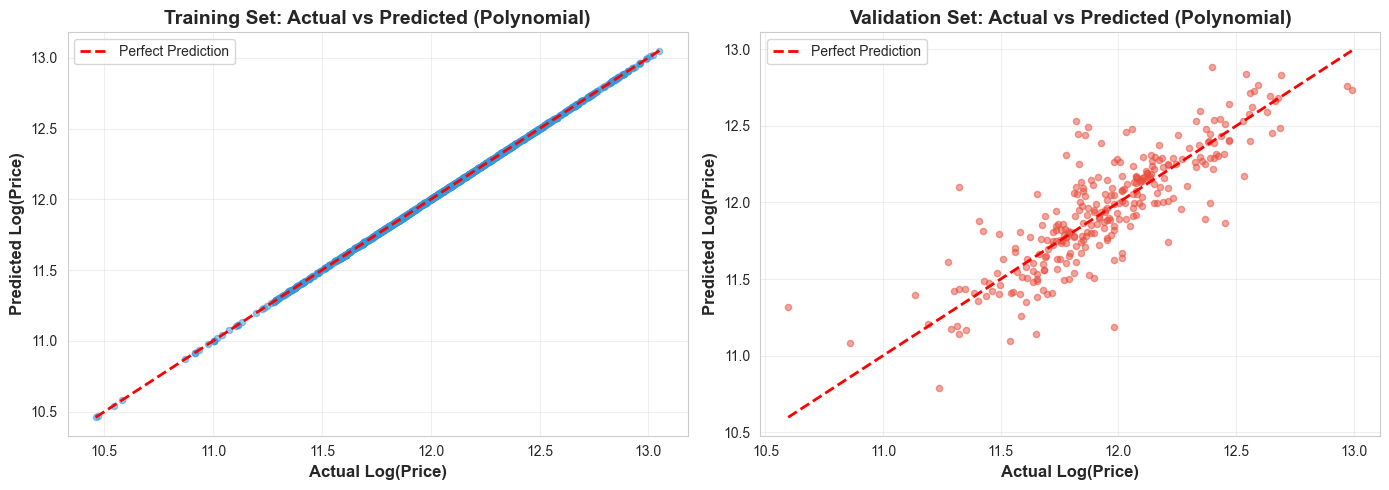


Polynomial Regression Model Performance:
Training R²: 1.0000
Validation R²: 0.6403

MODEL COMPARISON: Linear vs Polynomial Regression

Linear Regression:
  Training R²:   0.9493
  Validation R²: 0.8695

Polynomial Regression (Degree 2):
  Training R²:   1.0000
  Validation R²: 0.6403

Improvement:
  Training:   0.0507 (5.07%)
  Validation: -0.2292 (-22.92%)


In [1205]:
# Visualizations: Predictions vs Actual for Polynomial Regression
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Use the main Polynomial Regression model for predictions
y_train_pred_poly_final = poly_model.predict(X_train_poly)
y_val_pred_poly_final = poly_model.predict(X_val_poly)

# Training set predictions
axes[0].scatter(y_train_final, y_train_pred_poly_final, alpha=0.5, s=20, color='#3498db')
axes[0].plot([y_train_final.min(), y_train_final.max()], 
             [y_train_final.min(), y_train_final.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Price)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Log(Price)', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set: Actual vs Predicted (Polynomial)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set predictions
axes[1].scatter(y_val, y_val_pred_poly_final, alpha=0.5, s=20, color='#e74c3c')
axes[1].plot([y_val.min(), y_val.max()], 
             [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Price)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Log(Price)', fontsize=12, fontweight='bold')
axes[1].set_title('Validation Set: Actual vs Predicted (Polynomial)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate R² for the main polynomial model
train_r2_poly_final = r2_score(y_train_final, y_train_pred_poly_final)
val_r2_poly_final = r2_score(y_val, y_val_pred_poly_final)

print(f"\nPolynomial Regression Model Performance:")
print(f"Training R²: {train_r2_poly_final:.4f}")
print(f"Validation R²: {val_r2_poly_final:.4f}")

# Compare with Linear Regression
print(f"\n" + "="*60)
print("MODEL COMPARISON: Linear vs Polynomial Regression")
print("="*60)
print(f"\nLinear Regression:")
print(f"  Training R²:   {train_r2_final:.4f}")
print(f"  Validation R²: {val_r2_final:.4f}")
print(f"\nPolynomial Regression (Degree 2):")
print(f"  Training R²:   {train_r2_poly_final:.4f}")
print(f"  Validation R²: {val_r2_poly_final:.4f}")
print(f"\nImprovement:")
print(f"  Training:   {(train_r2_poly_final - train_r2_final):.4f} ({(train_r2_poly_final - train_r2_final)*100:.2f}%)")
print(f"  Validation: {(val_r2_poly_final - val_r2_final):.4f} ({(val_r2_poly_final - val_r2_final)*100:.2f}%)")
print("="*60)

## End of Polynomial Regression
- Horrible overfitting during the training stage.
- Model is too complex for the linear relationship of the target data, leading to overfitting with a degree count of more than 1.

## Ridge Regression

In [1206]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

print("="*60)
print("RIDGE REGRESSION MODEL")
print("="*60)

# Grid search to find optimal alpha (regularization strength)
param_grid = {
    'alpha': [0.0001, 0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 7.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
}

ridge = Ridge(random_state=42)

print("\nPerforming grid search for optimal alpha...")
grid_search = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(X_train_final, y_train_final)

# Get best model
ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print(f"\n✓ Best alpha found: {best_alpha}")
print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")
print(f"Number of features used: {ridge_model.n_features_in_}")
print("="*60)

RIDGE REGRESSION MODEL

Performing grid search for optimal alpha...

✓ Best alpha found: 5.0
Best cross-validation R²: 0.8899
Number of features used: 226

✓ Best alpha found: 5.0
Best cross-validation R²: 0.8899
Number of features used: 226


In [1207]:
# Make predictions
y_train_pred_ridge = ridge_model.predict(X_train_final)
y_val_pred_ridge = ridge_model.predict(X_val)

# Check for extreme predictions
print("\nPrediction statistics:")
print(f"Training predictions - Min: {y_train_pred_ridge.min():.4f}, Max: {y_train_pred_ridge.max():.4f}, Mean: {y_train_pred_ridge.mean():.4f}")
print(f"Validation predictions - Min: {y_val_pred_ridge.min():.4f}, Max: {y_val_pred_ridge.max():.4f}, Mean: {y_val_pred_ridge.mean():.4f}")

# Calculate metrics on log-scale
train_mse_ridge = mean_squared_error(y_train_final, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(train_mse_ridge)
train_mae_ridge = mean_absolute_error(y_train_final, y_train_pred_ridge)
train_r2_ridge = r2_score(y_train_final, y_train_pred_ridge)

val_mse_ridge = mean_squared_error(y_val, y_val_pred_ridge)
val_rmse_ridge = np.sqrt(val_mse_ridge)
val_mae_ridge = mean_absolute_error(y_val, y_val_pred_ridge)
val_r2_ridge = r2_score(y_val, y_val_pred_ridge)

# Display results
print("\n" + "="*60)
print("RIDGE REGRESSION MODEL PERFORMANCE (Log-Scale)")
print("="*60)
print("\nTraining Metrics:")
print(f"  MSE:  {train_mse_ridge:.4f}")
print(f"  RMSE: {train_rmse_ridge:.4f}")
print(f"  MAE:  {train_mae_ridge:.4f}")
print(f"  R²:   {train_r2_ridge:.4f}")

print("\nValidation Metrics:")
print(f"  MSE:  {val_mse_ridge:.4f}")
print(f"  RMSE: {val_rmse_ridge:.4f}")
print(f"  MAE:  {val_mae_ridge:.4f}")
print(f"  R²:   {val_r2_ridge:.4f}")

print(f"\nOverfitting Gap (Train R² - Val R²): {(train_r2_ridge - val_r2_ridge):.4f}")

# Convert predictions back to original scale
y_train_pred_ridge_original = np.expm1(y_train_pred_ridge)
y_val_pred_ridge_original = np.expm1(y_val_pred_ridge)
y_train_original = np.expm1(y_train_final)
y_val_original = np.expm1(y_val)

print("\n" + "="*60)
print("PERFORMANCE IN ORIGINAL PRICE SCALE ($)")
print("="*60)
try:
    train_rmse_ridge_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_ridge_original))
    train_mae_ridge_original = mean_absolute_error(y_train_original, y_train_pred_ridge_original)
    train_r2_ridge_original = r2_score(y_train_original, y_train_pred_ridge_original)
    
    val_rmse_ridge_original = np.sqrt(mean_squared_error(y_val_original, y_val_pred_ridge_original))
    val_mae_ridge_original = mean_absolute_error(y_val_original, y_val_pred_ridge_original)
    val_r2_ridge_original = r2_score(y_val_original, y_val_pred_ridge_original)
    
    print("\nTraining Metrics:")
    print(f"  RMSE: ${train_rmse_ridge_original:,.2f}")
    print(f"  MAE:  ${train_mae_ridge_original:,.2f}")
    print(f"  R²:   {train_r2_ridge_original:.4f}")
    
    print("\nValidation Metrics:")
    print(f"  RMSE: ${val_rmse_ridge_original:,.2f}")
    print(f"  MAE:  ${val_mae_ridge_original:,.2f}")
    print(f"  R²:   {val_r2_ridge_original:.4f}")
except (ValueError, OverflowError) as e:
    print(f"\n⚠️  Unable to compute original scale metrics: {str(e)}")
    print("This may indicate extreme predictions.")
print("="*60)


Prediction statistics:
Training predictions - Min: 10.7051, Max: 13.0039, Mean: 12.0299
Validation predictions - Min: 11.1579, Max: 12.9315, Mean: 11.9630

RIDGE REGRESSION MODEL PERFORMANCE (Log-Scale)

Training Metrics:
  MSE:  0.0111
  RMSE: 0.1052
  MAE:  0.0705
  R²:   0.9281

Validation Metrics:
  MSE:  0.0158
  RMSE: 0.1256
  MAE:  0.0876
  R²:   0.8679

Overfitting Gap (Train R² - Val R²): 0.0602

PERFORMANCE IN ORIGINAL PRICE SCALE ($)

Training Metrics:
  RMSE: $21,360.75
  MAE:  $12,644.07
  R²:   0.9141

Validation Metrics:
  RMSE: $18,956.31
  MAE:  $13,794.32
  R²:   0.8970


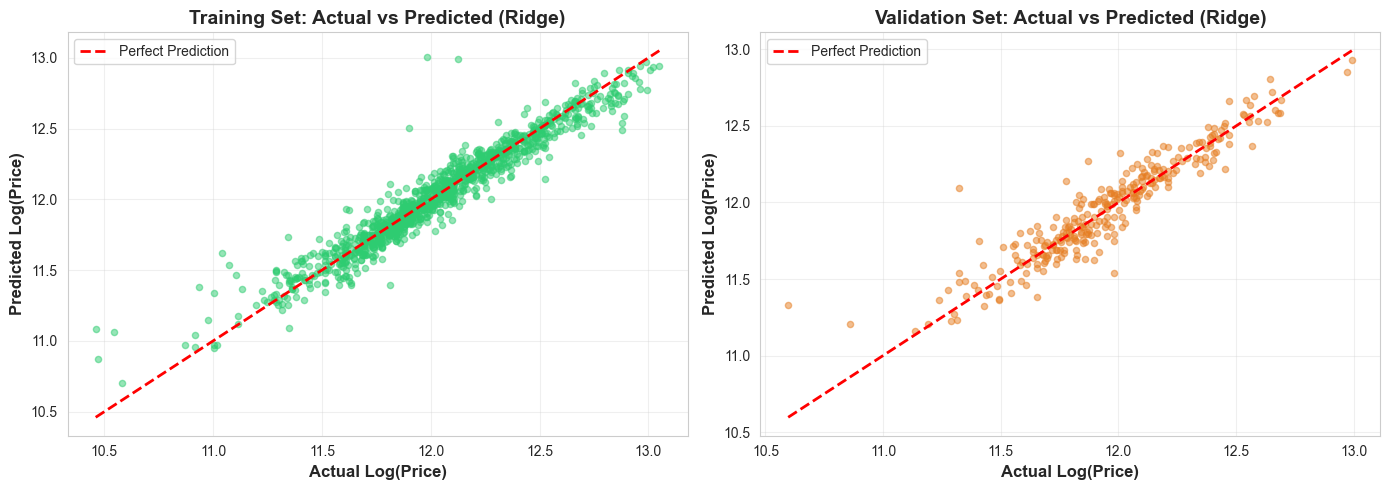


Ridge Regression Model Performance:
Training R²: 0.9281
Validation R²: 0.8679

MODEL COMPARISON: Linear vs Polynomial vs Ridge Regression

Linear Regression:
  Training R²:   0.9493
  Validation R²: 0.8695
  Overfitting Gap: 0.0798

Polynomial Regression (Degree 2):
  Training R²:   1.0000
  Validation R²: 0.6403
  Overfitting Gap: 0.3597

Ridge Regression (alpha=5.0):
  Training R²:   0.9281
  Validation R²: 0.8679
  Overfitting Gap: 0.0602

Best Validation Performance:
  Linear Regression with R² = 0.8695


In [1208]:
# Visualizations: Predictions vs Actual for Ridge Regression
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set predictions
axes[0].scatter(y_train_final, y_train_pred_ridge, alpha=0.5, s=20, color='#2ecc71')
axes[0].plot([y_train_final.min(), y_train_final.max()], 
             [y_train_final.min(), y_train_final.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Price)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Log(Price)', fontsize=12, fontweight='bold')
axes[0].set_title('Training Set: Actual vs Predicted (Ridge)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set predictions
axes[1].scatter(y_val, y_val_pred_ridge, alpha=0.5, s=20, color='#e67e22')
axes[1].plot([y_val.min(), y_val.max()], 
             [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Price)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Log(Price)', fontsize=12, fontweight='bold')
axes[1].set_title('Validation Set: Actual vs Predicted (Ridge)', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate R² for the Ridge model
train_r2_ridge_final = r2_score(y_train_final, y_train_pred_ridge)
val_r2_ridge_final = r2_score(y_val, y_val_pred_ridge)

print(f"\nRidge Regression Model Performance:")
print(f"Training R²: {train_r2_ridge_final:.4f}")
print(f"Validation R²: {val_r2_ridge_final:.4f}")

# Compare with Linear and Polynomial Regression
print(f"\n" + "="*60)
print("MODEL COMPARISON: Linear vs Polynomial vs Ridge Regression")
print("="*60)
print(f"\nLinear Regression:")
print(f"  Training R²:   {train_r2_final:.4f}")
print(f"  Validation R²: {val_r2_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_final - val_r2_final):.4f}")

print(f"\nPolynomial Regression (Degree 2):")
print(f"  Training R²:   {train_r2_poly_final:.4f}")
print(f"  Validation R²: {val_r2_poly_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_poly_final - val_r2_poly_final):.4f}")

print(f"\nRidge Regression (alpha={best_alpha}):")
print(f"  Training R²:   {train_r2_ridge_final:.4f}")
print(f"  Validation R²: {val_r2_ridge_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_ridge_final - val_r2_ridge_final):.4f}")

print(f"\n{'Best Validation Performance:'}")
models = {
    'Linear': val_r2_final,
    'Polynomial': val_r2_poly_final,
    'Ridge': val_r2_ridge_final
}
best_model = max(models, key=models.get)
print(f"  {best_model} Regression with R² = {models[best_model]:.4f}")
print("="*60)

## End of Ridge Regression
- Ridge regression performed better than polynomial regression, but failed to exceed standard linear regression.
- Features could already be well conditioned, meaning they wouldn't recieve much benefit from regularization.
- Removing the multicollinearity during the data cleaning stage might have defeated the need for ridge regression.

## SVR (Support Vector Regression)

In [1209]:
from sklearn.svm import SVR

print("="*60)
print("SUPPORT VECTOR REGRESSION (SVR) MODEL")
print("="*60)
print("\nNote: SVR can be computationally expensive for large datasets.")
print("Using RBF kernel with hyperparameter tuning...\n")

# Grid search for optimal SVR parameters
# Using a coarser grid for efficiency with large feature sets
param_grid_svr = {
    'C': [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0],  # Wider range
    'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.15, 0.2],  # More granular
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1.0]  # Include explicit values
}

svr = SVR(kernel='rbf', degree=2, cache_size=1000)

print("Performing grid search for optimal SVR parameters...")
print("This may take several minutes...")

grid_search_svr = GridSearchCV(
    svr,
    param_grid_svr,
    cv=5,  # Using 3-fold CV for efficiency
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search_svr.fit(X_train_final, y_train_final)

# Get best model
svr_model = grid_search_svr.best_estimator_
best_params_svr = grid_search_svr.best_params_

print(f"\n✓ Best parameters found:")
print(f"  C: {best_params_svr['C']}")
print(f"  epsilon: {best_params_svr['epsilon']}")
print(f"  gamma: {best_params_svr['gamma']}")
print(f"Best cross-validation R²: {grid_search_svr.best_score_:.4f}")
print(f"Number of support vectors: {svr_model.n_support_[0] if hasattr(svr_model, 'n_support_') else 'N/A'}")
print("="*60)

SUPPORT VECTOR REGRESSION (SVR) MODEL

Note: SVR can be computationally expensive for large datasets.
Using RBF kernel with hyperparameter tuning...

Performing grid search for optimal SVR parameters...
This may take several minutes...
Fitting 5 folds for each of 336 candidates, totalling 1680 fits



✓ Best parameters found:
  C: 10.0
  epsilon: 0.01
  gamma: 0.001
Best cross-validation R²: 0.8964
Number of support vectors: 1038


In [1210]:
# Make predictions
y_train_pred_svr = svr_model.predict(X_train_final)
y_val_pred_svr = svr_model.predict(X_val)

# Check for extreme predictions
print("\nPrediction statistics:")
print(f"Training predictions - Min: {y_train_pred_svr.min():.4f}, Max: {y_train_pred_svr.max():.4f}, Mean: {y_train_pred_svr.mean():.4f}")
print(f"Validation predictions - Min: {y_val_pred_svr.min():.4f}, Max: {y_val_pred_svr.max():.4f}, Mean: {y_val_pred_svr.mean():.4f}")

# Calculate metrics on log-scale
train_mse_svr = mean_squared_error(y_train_final, y_train_pred_svr)
train_rmse_svr = np.sqrt(train_mse_svr)
train_mae_svr = mean_absolute_error(y_train_final, y_train_pred_svr)
train_r2_svr = r2_score(y_train_final, y_train_pred_svr)

val_mse_svr = mean_squared_error(y_val, y_val_pred_svr)
val_rmse_svr = np.sqrt(val_mse_svr)
val_mae_svr = mean_absolute_error(y_val, y_val_pred_svr)
val_r2_svr = r2_score(y_val, y_val_pred_svr)

# Display results
print("\n" + "="*60)
print("SVR MODEL PERFORMANCE (Log-Scale)")
print("="*60)
print("\nTraining Metrics:")
print(f"  MSE:  {train_mse_svr:.4f}")
print(f"  RMSE: {train_rmse_svr:.4f}")
print(f"  MAE:  {train_mae_svr:.4f}")
print(f"  R²:   {train_r2_svr:.4f}")

print("\nValidation Metrics:")
print(f"  MSE:  {val_mse_svr:.4f}")
print(f"  RMSE: {val_rmse_svr:.4f}")
print(f"  MAE:  {val_mae_svr:.4f}")
print(f"  R²:   {val_r2_svr:.4f}")

print(f"\nOverfitting Gap (Train R² - Val R²): {(train_r2_svr - val_r2_svr):.4f}")

# Convert predictions back to original scale
y_train_pred_svr_original = np.expm1(y_train_pred_svr)
y_val_pred_svr_original = np.expm1(y_val_pred_svr)
y_train_original = np.expm1(y_train_final)
y_val_original = np.expm1(y_val)

print("\n" + "="*60)
print("PERFORMANCE IN ORIGINAL PRICE SCALE ($)")
print("="*60)
try:
    train_rmse_svr_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_svr_original))
    train_mae_svr_original = mean_absolute_error(y_train_original, y_train_pred_svr_original)
    train_r2_svr_original = r2_score(y_train_original, y_train_pred_svr_original)
    
    val_rmse_svr_original = np.sqrt(mean_squared_error(y_val_original, y_val_pred_svr_original))
    val_mae_svr_original = mean_absolute_error(y_val_original, y_val_pred_svr_original)
    val_r2_svr_original = r2_score(y_val_original, y_val_pred_svr_original)
    
    print("\nTraining Metrics:")
    print(f"  RMSE: ${train_rmse_svr_original:,.2f}")
    print(f"  MAE:  ${train_mae_svr_original:,.2f}")
    print(f"  R²:   {train_r2_svr_original:.4f}")
    
    print("\nValidation Metrics:")
    print(f"  RMSE: ${val_rmse_svr_original:,.2f}")
    print(f"  MAE:  ${val_mae_svr_original:,.2f}")
    print(f"  R²:   {val_r2_svr_original:.4f}")
except (ValueError, OverflowError) as e:
    print(f"\n⚠️  Unable to compute original scale metrics: {str(e)}")
    print("This may indicate extreme predictions.")
print("="*60)


Prediction statistics:
Training predictions - Min: 10.7084, Max: 13.2781, Mean: 12.0373
Validation predictions - Min: 11.1449, Max: 12.9841, Mean: 11.9659

SVR MODEL PERFORMANCE (Log-Scale)

Training Metrics:
  MSE:  0.0090
  RMSE: 0.0950
  MAE:  0.0454
  R²:   0.9414

Validation Metrics:
  MSE:  0.0158
  RMSE: 0.1255
  MAE:  0.0834
  R²:   0.8680

Overfitting Gap (Train R² - Val R²): 0.0734

PERFORMANCE IN ORIGINAL PRICE SCALE ($)

Training Metrics:
  RMSE: $21,793.27
  MAE:  $8,142.28
  R²:   0.9106

Validation Metrics:
  RMSE: $19,372.52
  MAE:  $13,241.95
  R²:   0.8924


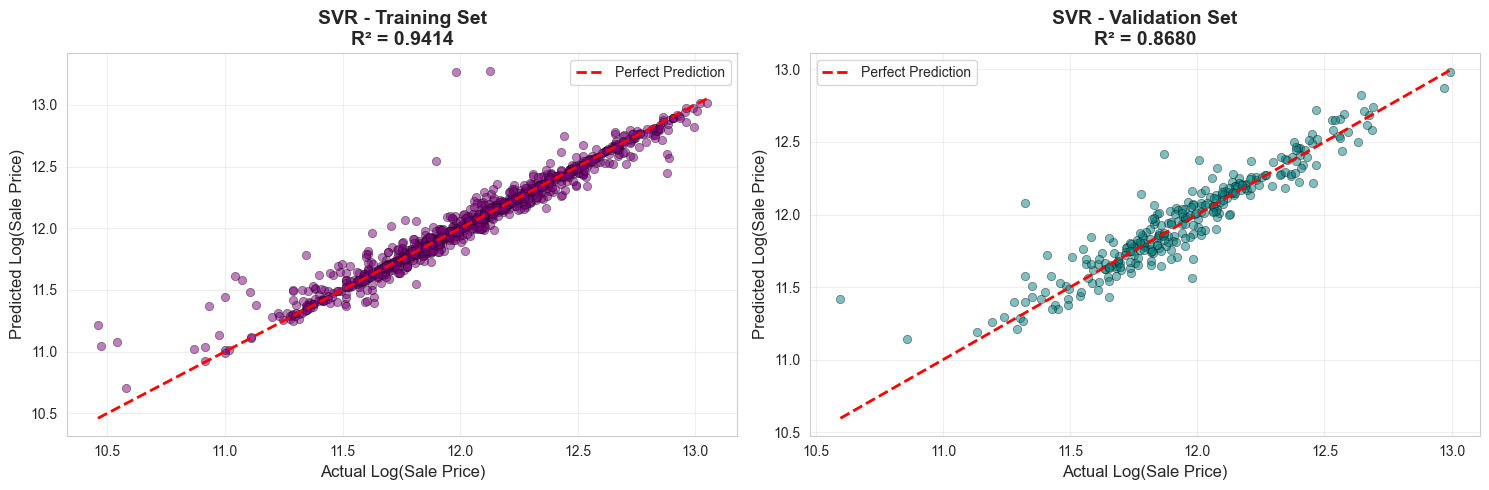


MODEL COMPARISON: Linear vs Polynomial vs Ridge Regression vs SVR

Linear Regression:
  Training R²:   0.9493
  Validation R²: 0.8695
  Overfitting Gap: 0.0798

Polynomial Regression (Degree 2):
  Training R²:   1.0000
  Validation R²: 0.6403
  Overfitting Gap: 0.3597

Ridge Regression (alpha=5.0):
  Training R²:   0.9281
  Validation R²: 0.8679
  Overfitting Gap: 0.0602

Support Vector Regression (SVR):
  Training R²:   0.9414
  Validation R²: 0.8680
  Overfitting Gap: 0.0734

Best Validation Performance:
  Linear Regression with R² = 0.8695


In [1211]:
# Plot actual vs predicted for SVR model
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train_final, y_train_pred_svr, alpha=0.5, color='purple', edgecolors='k', linewidth=0.5)
axes[0].plot([y_train_final.min(), y_train_final.max()], 
             [y_train_final.min(), y_train_final.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Sale Price)', fontsize=12)
axes[0].set_ylabel('Predicted Log(Sale Price)', fontsize=12)
axes[0].set_title(f'SVR - Training Set\nR² = {train_r2_svr:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_val_pred_svr, alpha=0.5, color='teal', edgecolors='k', linewidth=0.5)
axes[1].plot([y_val.min(), y_val.max()], 
             [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Sale Price)', fontsize=12)
axes[1].set_ylabel('Predicted Log(Sale Price)', fontsize=12)
axes[1].set_title(f'SVR - Validation Set\nR² = {val_r2_svr:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare with Linear and Polynomial Regression
print(f"\n" + "="*60)
print("MODEL COMPARISON: Linear vs Polynomial vs Ridge Regression vs SVR")
print("="*60)
print(f"\nLinear Regression:")
print(f"  Training R²:   {train_r2_final:.4f}")
print(f"  Validation R²: {val_r2_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_final - val_r2_final):.4f}")

print(f"\nPolynomial Regression (Degree 2):")
print(f"  Training R²:   {train_r2_poly_final:.4f}")
print(f"  Validation R²: {val_r2_poly_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_poly_final - val_r2_poly_final):.4f}")

print(f"\nRidge Regression (alpha={best_alpha}):")
print(f"  Training R²:   {train_r2_ridge_final:.4f}")
print(f"  Validation R²: {val_r2_ridge_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_ridge_final - val_r2_ridge_final):.4f}")

print(f"\nSupport Vector Regression (SVR):")
print(f"  Training R²:   {train_r2_svr:.4f}")
print(f"  Validation R²: {val_r2_svr:.4f}")
print(f"  Overfitting Gap: {(train_r2_svr - val_r2_svr):.4f}")

print(f"\n{'Best Validation Performance:'}")
models = {
    'Linear': val_r2_final,
    'Polynomial': val_r2_poly_final,
    'Ridge': val_r2_ridge_final,
    'SVR': val_r2_svr
}
best_model = max(models, key=models.get)
print(f"  {best_model} Regression with R² = {models[best_model]:.4f}")
print("="*60)

## End of SVR
- Performed the best compared to ridge and polynomial regression, but still failed to beat the accuracy of the basic linear regression model.
- SVR can suffer from high dimensionality, so having a large feature set could have made this model perform worse than it otherwise would have with fewer features.
- The data used by Manasa was from the Machine Hackathon, and was composed of 9 features that described housing properties in Bengaluru. Their implementation of ridge regression performed much better, and considering the much smaller size it makes sense.

## Random Forest

In [1212]:
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [25, 50, 75, 100, 200],
    'max_depth': [10, 20, 30, 50, None],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2']
}

# Initialize Random Forest
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# Perform GridSearchCV
print("="*60)
print("RANDOM FOREST HYPERPARAMETER TUNING")
print("="*60)
print(f"\nSearching through {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf']) * len(param_grid_rf['max_features'])} combinations...")
print("This may take several minutes...\n")

grid_search_rf = GridSearchCV(
    rf,
    param_grid_rf,
    cv=3,  # 3-fold CV for efficiency
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search_rf.fit(X_train_final, y_train_final)

# Get best model
rf_model = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

print("\n" + "="*60)
print("BEST HYPERPARAMETERS FOUND")
print("="*60)
print(f"n_estimators: {best_params_rf['n_estimators']}")
print(f"max_depth: {best_params_rf['max_depth']}")
print(f"min_samples_split: {best_params_rf['min_samples_split']}")
print(f"min_samples_leaf: {best_params_rf['min_samples_leaf']}")
print(f"max_features: {best_params_rf['max_features']}")
print(f"\nBest cross-validation R² score: {grid_search_rf.best_score_:.4f}")
print("="*60)

RANDOM FOREST HYPERPARAMETER TUNING

Searching through 800 combinations...
This may take several minutes...

Fitting 3 folds for each of 800 candidates, totalling 2400 fits

BEST HYPERPARAMETERS FOUND
n_estimators: 200
max_depth: 20
min_samples_split: 2
min_samples_leaf: 1
max_features: sqrt

Best cross-validation R² score: 0.8638

BEST HYPERPARAMETERS FOUND
n_estimators: 200
max_depth: 20
min_samples_split: 2
min_samples_leaf: 1
max_features: sqrt

Best cross-validation R² score: 0.8638


In [1213]:
# Make predictions
y_train_pred_rf = rf_model.predict(X_train_final)
y_val_pred_rf = rf_model.predict(X_val)

# Calculate metrics on log-scale
train_mse_rf = mean_squared_error(y_train_final, y_train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_mae_rf = mean_absolute_error(y_train_final, y_train_pred_rf)
train_r2_rf = r2_score(y_train_final, y_train_pred_rf)

val_mse_rf = mean_squared_error(y_val, y_val_pred_rf)
val_rmse_rf = np.sqrt(val_mse_rf)
val_mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
val_r2_rf = r2_score(y_val, y_val_pred_rf)

# Display results
print("\n" + "="*60)
print("RANDOM FOREST MODEL PERFORMANCE (Log-Scale)")
print("="*60)
print("\nTraining Metrics:")
print(f"  MSE:  {train_mse_rf:.4f}")
print(f"  RMSE: {train_rmse_rf:.4f}")
print(f"  MAE:  {train_mae_rf:.4f}")
print(f"  R²:   {train_r2_rf:.4f}")

print("\nValidation Metrics:")
print(f"  MSE:  {val_mse_rf:.4f}")
print(f"  RMSE: {val_rmse_rf:.4f}")
print(f"  MAE:  {val_mae_rf:.4f}")
print(f"  R²:   {val_r2_rf:.4f}")

print(f"\nOverfitting Gap (Train R² - Val R²): {(train_r2_rf - val_r2_rf):.4f}")

# Convert predictions back to original scale
y_train_pred_rf_original = np.expm1(y_train_pred_rf)
y_val_pred_rf_original = np.expm1(y_val_pred_rf)

print("\n" + "="*60)
print("PERFORMANCE IN ORIGINAL PRICE SCALE ($)")
print("="*60)

train_rmse_rf_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_rf_original))
train_mae_rf_original = mean_absolute_error(y_train_original, y_train_pred_rf_original)
train_r2_rf_original = r2_score(y_train_original, y_train_pred_rf_original)

val_rmse_rf_original = np.sqrt(mean_squared_error(y_val_original, y_val_pred_rf_original))
val_mae_rf_original = mean_absolute_error(y_val_original, y_val_pred_rf_original)
val_r2_rf_original = r2_score(y_val_original, y_val_pred_rf_original)

print("\nTraining Metrics:")
print(f"  RMSE: ${train_rmse_rf_original:,.2f}")
print(f"  MAE:  ${train_mae_rf_original:,.2f}")
print(f"  R²:   {train_r2_rf_original:.4f}")

print("\nValidation Metrics:")
print(f"  RMSE: ${val_rmse_rf_original:,.2f}")
print(f"  MAE:  ${val_mae_rf_original:,.2f}")
print(f"  R²:   {val_r2_rf_original:.4f}")
print("="*60)


RANDOM FOREST MODEL PERFORMANCE (Log-Scale)

Training Metrics:
  MSE:  0.0029
  RMSE: 0.0535
  MAE:  0.0355
  R²:   0.9814

Validation Metrics:
  MSE:  0.0192
  RMSE: 0.1384
  MAE:  0.0910
  R²:   0.8395

Overfitting Gap (Train R² - Val R²): 0.1419

PERFORMANCE IN ORIGINAL PRICE SCALE ($)

Training Metrics:
  RMSE: $10,506.37
  MAE:  $6,430.67
  R²:   0.9792

Validation Metrics:
  RMSE: $22,372.09
  MAE:  $14,390.69
  R²:   0.8565


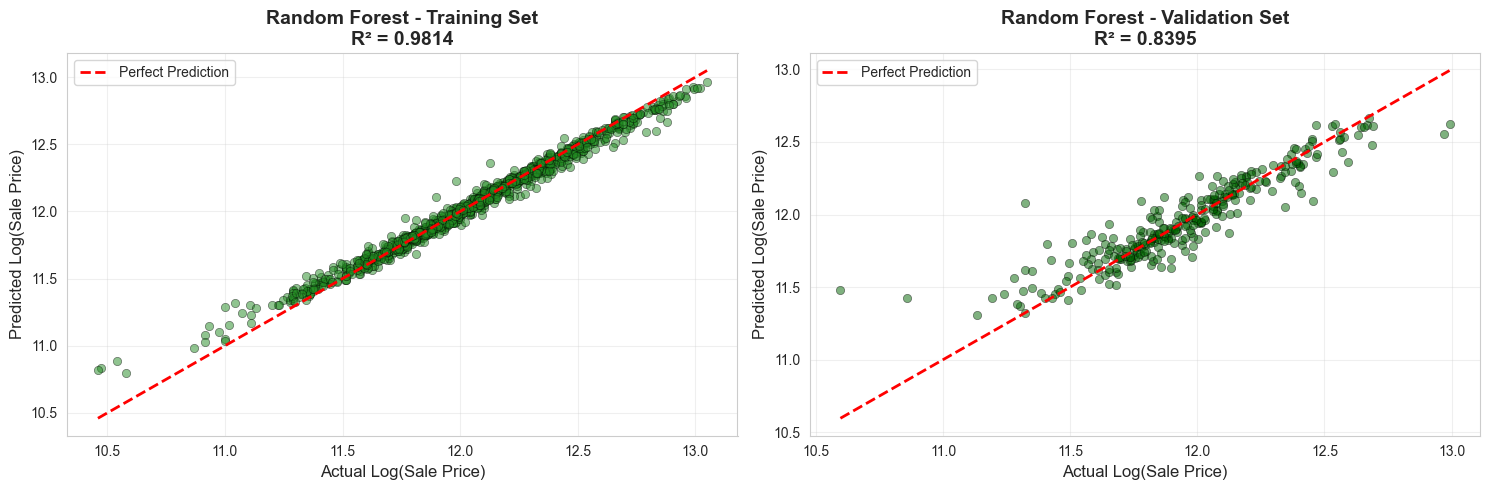


MODEL COMPARISON: Linear vs Polynomial vs Ridge Regression vs SVR

Linear Regression:
  Training R²:   0.9493
  Validation R²: 0.8695
  Overfitting Gap: 0.0798

Polynomial Regression (Degree 2):
  Training R²:   1.0000
  Validation R²: 0.6403
  Overfitting Gap: 0.3597

Ridge Regression (alpha=5.0):
  Training R²:   0.9281
  Validation R²: 0.8679
  Overfitting Gap: 0.0602

Support Vector Regression (SVR):
  Training R²:   0.9414
  Validation R²: 0.8680
  Overfitting Gap: 0.0734

Random Forest Regression:
  Training R²:   0.9814
  Validation R²: 0.8395
  Overfitting Gap: 0.1419

Best Validation Performance:
  Linear Regression with R² = 0.8695


In [1214]:
# Plot actual vs predicted for Random Forest model
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training set
axes[0].scatter(y_train_final, y_train_pred_rf, alpha=0.5, color='forestgreen', edgecolors='k', linewidth=0.5)
axes[0].plot([y_train_final.min(), y_train_final.max()], 
             [y_train_final.min(), y_train_final.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Log(Sale Price)', fontsize=12)
axes[0].set_ylabel('Predicted Log(Sale Price)', fontsize=12)
axes[0].set_title(f'Random Forest - Training Set\nR² = {train_r2_rf:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Validation set
axes[1].scatter(y_val, y_val_pred_rf, alpha=0.5, color='darkgreen', edgecolors='k', linewidth=0.5)
axes[1].plot([y_val.min(), y_val.max()], 
             [y_val.min(), y_val.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Log(Sale Price)', fontsize=12)
axes[1].set_ylabel('Predicted Log(Sale Price)', fontsize=12)
axes[1].set_title(f'Random Forest - Validation Set\nR² = {val_r2_rf:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare with Linear and Polynomial Regression
print(f"\n" + "="*60)
print("MODEL COMPARISON: Linear vs Polynomial vs Ridge Regression vs SVR")
print("="*60)
print(f"\nLinear Regression:")
print(f"  Training R²:   {train_r2_final:.4f}")
print(f"  Validation R²: {val_r2_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_final - val_r2_final):.4f}")

print(f"\nPolynomial Regression (Degree 2):")
print(f"  Training R²:   {train_r2_poly_final:.4f}")
print(f"  Validation R²: {val_r2_poly_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_poly_final - val_r2_poly_final):.4f}")

print(f"\nRidge Regression (alpha={best_alpha}):")
print(f"  Training R²:   {train_r2_ridge_final:.4f}")
print(f"  Validation R²: {val_r2_ridge_final:.4f}")
print(f"  Overfitting Gap: {(train_r2_ridge_final - val_r2_ridge_final):.4f}")

print(f"\nSupport Vector Regression (SVR):")
print(f"  Training R²:   {train_r2_svr:.4f}")
print(f"  Validation R²: {val_r2_svr:.4f}")
print(f"  Overfitting Gap: {(train_r2_svr - val_r2_svr):.4f}")

print(f"\nRandom Forest Regression:")
print(f"  Training R²:   {train_r2_rf:.4f}")
print(f"  Validation R²: {val_r2_rf:.4f}")
print(f"  Overfitting Gap: {(train_r2_rf - val_r2_rf):.4f}")

print(f"\n{'Best Validation Performance:'}")
models = {
    'Linear': val_r2_final,
    'Polynomial': val_r2_poly_final,
    'Ridge': val_r2_ridge_final,
    'SVR': val_r2_svr,
    'Random Forest': val_r2_rf
}
best_model = max(models, key=models.get)
print(f"  {best_model} Regression with R² = {models[best_model]:.4f}")
print("="*60)

## End of Random Forest Regression
- Random Forest is the most complicated to tune the hyperparameters of, and is very sensitive to minor adjustments. 
- Training performance was much better than the other models, but it performed worse than most other models during validation.
- Ho achieved an $R^{2}$ score of 0.90333 with a CV of 5. Considering the dataset they used only contains roughly 13 features, it's likely the dimensions of this dataset are too large to make use of their techniques.

## Final Comparison

In [1217]:
import pandas as pd

# Create comprehensive model comparison table
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'SVR', 'Random Forest'],
    'Train RMSE (log)': [train_rmse, train_rmse_poly, train_rmse_ridge, train_rmse_svr, train_rmse_rf],
    'Val RMSE (log)': [val_rmse, val_rmse_poly, val_rmse_ridge, val_rmse_svr, val_rmse_rf],
    'Train R²': [train_r2_final, train_r2_poly_final, train_r2_ridge_final, train_r2_svr, train_r2_rf],
    'Val R²': [val_r2_final, val_r2_poly_final, val_r2_ridge_final, val_r2_svr, val_r2_rf],
    'Val RMSE ($)': [val_rmse_original, val_rmse_poly_original, val_rmse_ridge_original, val_rmse_svr_original, val_rmse_rf_original],
    'Val MAE ($)': [val_mae_original, val_mae_poly_original, val_mae_ridge_original, val_mae_svr_original, val_mae_rf_original],
    'Overfitting Gap': [
        train_r2_final - val_r2_final,
        train_r2_poly_final - val_r2_poly_final,
        train_r2_ridge_final - val_r2_ridge_final,
        train_r2_svr - val_r2_svr,
        train_r2_rf - val_r2_rf
    ]
})

# Rank models by Validation R² (higher is better)
model_comparison['R² Rank'] = model_comparison['Val R²'].rank(ascending=False).astype(int)

# Rank models by Validation RMSE ($ scale, lower is better)
model_comparison['RMSE Rank'] = model_comparison['Val RMSE ($)'].rank(ascending=True).astype(int)

# Calculate average rank score (average of R² Rank and RMSE Rank)
avg_rank_score = (model_comparison['R² Rank'] + model_comparison['RMSE Rank']) / 2

# Assign overall rank (1-5) based on the average rank score
model_comparison['Avg Rank'] = avg_rank_score.rank(method='min').astype(int)

# Sort by average rank (best models first)
model_comparison = model_comparison.sort_values('Avg Rank')

# Display the comparison table using Pandas Styler
print("="*120)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*120)
print("\nMetrics on Log-Scale:")

# Style the log-scale table
log_scale_table = model_comparison[['Model', 'Train RMSE (log)', 'Val RMSE (log)', 'Train R²', 'Val R²', 'Overfitting Gap']].copy()

styled_log_table = (log_scale_table.style
    .background_gradient(subset=['Train R²', 'Val R²'], cmap='Greens', vmin=0, vmax=1)
    .background_gradient(subset=['Train RMSE (log)', 'Val RMSE (log)'], cmap='Reds_r', vmin=0)
    .background_gradient(subset=['Overfitting Gap'], cmap='RdYlGn_r', vmin=0, vmax=0.4)
    .format({
        'Train RMSE (log)': '{:.4f}',
        'Val RMSE (log)': '{:.4f}',
        'Train R²': '{:.4f}',
        'Val R²': '{:.4f}',
        'Overfitting Gap': '{:.4f}'
    })
    .set_properties(**{'text-align': 'center', 'font-weight': 'bold'}, subset=['Model'])
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2C3E50'), ('color', 'white'), 
                                      ('font-weight', 'bold'), ('text-align', 'center'), 
                                      ('padding', '10px'), ('font-size', '12px')]},
        {'selector': 'td', 'props': [('padding', '8px'), ('font-size', '11px')]},
        {'selector': '', 'props': [('border-collapse', 'collapse'), ('margin', '25px 0'), 
                                    ('font-family', 'Arial, sans-serif'), ('box-shadow', '0 0 20px rgba(0,0,0,0.15)')]}
    ])
)

display(styled_log_table)

print("\n" + "="*120)
print("Metrics on Original Scale ($) with Rankings:")

# Style the original scale table with rankings
original_scale_table = model_comparison[['Model', 'Val RMSE ($)', 'Val MAE ($)', 'Val R²', 'R² Rank', 'RMSE Rank', 'Avg Rank']].copy()

def highlight_best_rank(val):
    if val == 1.0:
        return 'background-color: gold; font-weight: bold; color: black'
    elif val == 2.0:
        return 'background-color: silver; font-weight: bold; color: black'
    elif val == 3.0:
        return 'background-color: #CD7F32; font-weight: bold; color: white'
    return ''

styled_original_table = (original_scale_table.style
    .background_gradient(subset=['Val R²'], cmap='Greens', vmin=0, vmax=1)
    .background_gradient(subset=['Val RMSE ($)', 'Val MAE ($)'], cmap='Reds_r')
    .applymap(highlight_best_rank, subset=['R² Rank', 'RMSE Rank', 'Avg Rank'])
    .format({
        'Val RMSE ($)': '${:,.2f}',
        'Val MAE ($)': '${:,.2f}',
        'Avg Rank': '{:.0f}',
        'R² Rank': '{:.0f}',
        'RMSE Rank': '{:.0f}',
        'Avg Rank': '{:.1f}'
    })
    .set_properties(**{'text-align': 'center', 'font-weight': 'bold'}, subset=['Model'])
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2C3E50'), ('color', 'white'), 
                                      ('font-weight', 'bold'), ('text-align', 'center'), 
                                      ('padding', '10px'), ('font-size', '12px')]},
        {'selector': 'td', 'props': [('padding', '8px'), ('font-size', '11px')]},
        {'selector': '', 'props': [('border-collapse', 'collapse'), ('margin', '25px 0'), 
                                    ('font-family', 'Arial, sans-serif'), ('box-shadow', '0 0 20px rgba(0,0,0,0.15)')]}
    ])
)

display(styled_original_table)

print("\n" + "="*120)
print("RANKING SUMMARY WITH STYLED TABLE")
print("="*120)

# Create ranking summary table
ranking_summary = model_comparison[['Model', 'Val R²', 'R² Rank', 'Val RMSE ($)', 'RMSE Rank', 'Avg Rank', 'Overfitting Gap']].copy()
ranking_summary = ranking_summary.reset_index(drop=True)

# Add overfitting status column
def get_overfitting_status(gap):
    if gap < 0.1:
        return "✓ Good"
    elif gap < 0.2:
        return "⚠ Overfitting"
    else:
        return "✗ Severe"

ranking_summary['Status'] = ranking_summary['Overfitting Gap'].apply(get_overfitting_status)

# Style the ranking summary table
def color_overfitting_status(val):
    if val == "✓ Good":
        return 'background-color: #90EE90; color: black; font-weight: bold'
    elif val == "⚠ Overfitting":
        return 'background-color: #FFD700; color: black; font-weight: bold'
    else:
        return 'background-color: #FF6B6B; color: white; font-weight: bold'

styled_ranking = (ranking_summary.style
    .background_gradient(subset=['Val R²'], cmap='Greens', vmin=0, vmax=1)
    .background_gradient(subset=['Val RMSE ($)'], cmap='Reds_r')
    .background_gradient(subset=['Overfitting Gap'], cmap='RdYlGn_r', vmin=0, vmax=0.4)
    .applymap(highlight_best_rank, subset=['Avg Rank'])
    .applymap(color_overfitting_status, subset=['Status'])
    .format({
        'Val R²': '{:.4f}',
        'Avg Rank': '{:.0f}',
        'Val RMSE ($)': '${:,.2f}',
        'RMSE Rank': '{:.0f}',
        'Avg Rank': '{:.1f}',
        'Overfitting Gap': '{:.4f}'
    })
    .set_properties(**{'text-align': 'center', 'font-weight': 'bold'}, subset=['Model'])
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#34495E'), ('color', 'white'), 
                                      ('font-weight', 'bold'), ('text-align', 'center'), 
                                      ('padding', '12px'), ('font-size', '13px')]},
        {'selector': 'td', 'props': [('padding', '10px'), ('font-size', '12px'), ('text-align', 'center')]},
        {'selector': '', 'props': [('border-collapse', 'collapse'), ('margin', '25px 0'), 
                                    ('font-family', 'Arial, sans-serif'), ('box-shadow', '0 0 20px rgba(0,0,0,0.15)')]}
    ])
    .set_caption("🏆 Model Performance Ranking (Sorted by Average Rank)")
)

display(styled_ranking)

print("\n" + "="*120)
print("BEST MODEL RECOMMENDATION")
print("="*120)

best_model_row = model_comparison.iloc[0]
print(f"\nBased on combined R² and RMSE rankings:")
print(f"🏆 Winner: {best_model_row['Model']}")
print(f"   • Explains {best_model_row['Val R²']*100:.2f}% of variance in house prices")
print(f"   • Average prediction error: ${best_model_row['Val MAE ($)']:,.2f}")
print(f"   • Root mean squared error: ${best_model_row['Val RMSE ($)']:,.2f}")
print(f"   • Overfitting gap: {best_model_row['Overfitting Gap']:.4f}")

if best_model_row['Overfitting Gap'] < 0.1:
    print(f"   • ✓ Excellent generalization - minimal overfitting")
elif best_model_row['Overfitting Gap'] < 0.2:
    print(f"   • ⚠ Moderate overfitting - acceptable for deployment")
else:
    print(f"   • ✗ Significant overfitting - consider regularization")
print("="*120)


COMPREHENSIVE MODEL COMPARISON

Metrics on Log-Scale:


,Model,Train RMSE (log),Val RMSE (log),Train R²,Val R²,Overfitting Gap
0,Linear Regression,0.0884,0.1249,0.9493,0.8695,0.0798
2,Ridge Regression,0.1052,0.1256,0.9281,0.8679,0.0602
3,SVR,0.0950,0.1255,0.9414,0.8680,0.0734
4,Random Forest,0.0535,0.1384,0.9814,0.8395,0.1419
1,Polynomial Regression,0.0000,0.2073,1.0000,0.6403,0.3597



Metrics on Original Scale ($) with Rankings:


C:\Users\herod\AppData\Local\Temp\ipykernel_27556\2279185462.py:87: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_best_rank, subset=['R² Rank', 'RMSE Rank', 'Avg Rank'])


,Model,Val RMSE ($),Val MAE ($),Val R²,R² Rank,RMSE Rank,Avg Rank
0,Linear Regression,"$19,179.33","$13,664.94",0.869454,1,2,1.0
2,Ridge Regression,"$18,956.31","$13,794.32",0.867895,3,1,2.0
3,SVR,"$19,372.52","$13,241.95",0.868034,2,3,3.0
4,Random Forest,"$22,372.09","$14,390.69",0.839542,4,4,4.0
1,Polynomial Regression,"$35,086.86","$24,093.00",0.640262,5,5,5.0



RANKING SUMMARY WITH STYLED TABLE


C:\Users\herod\AppData\Local\Temp\ipykernel_27556\2279185462.py:141: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_best_rank, subset=['Avg Rank'])
C:\Users\herod\AppData\Local\Temp\ipykernel_27556\2279185462.py:142: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(color_overfitting_status, subset=['Status'])


,Model,Val R²,R² Rank,Val RMSE ($),RMSE Rank,Avg Rank,Overfitting Gap,Status
0,Linear Regression,0.8695,1,"$19,179.33",2,1.0,0.0798,✓ Good
1,Ridge Regression,0.8679,3,"$18,956.31",1,2.0,0.0602,✓ Good
2,SVR,0.8680,2,"$19,372.52",3,3.0,0.0734,✓ Good
3,Random Forest,0.8395,4,"$22,372.09",4,4.0,0.1419,⚠ Overfitting
4,Polynomial Regression,0.6403,5,"$35,086.86",5,5.0,0.3597,✗ Severe



BEST MODEL RECOMMENDATION

Based on combined R² and RMSE rankings:
🏆 Winner: Linear Regression
   • Explains 86.95% of variance in house prices
   • Average prediction error: $13,664.94
   • Root mean squared error: $19,179.33
   • Overfitting gap: 0.0798
   • ✓ Excellent generalization - minimal overfitting


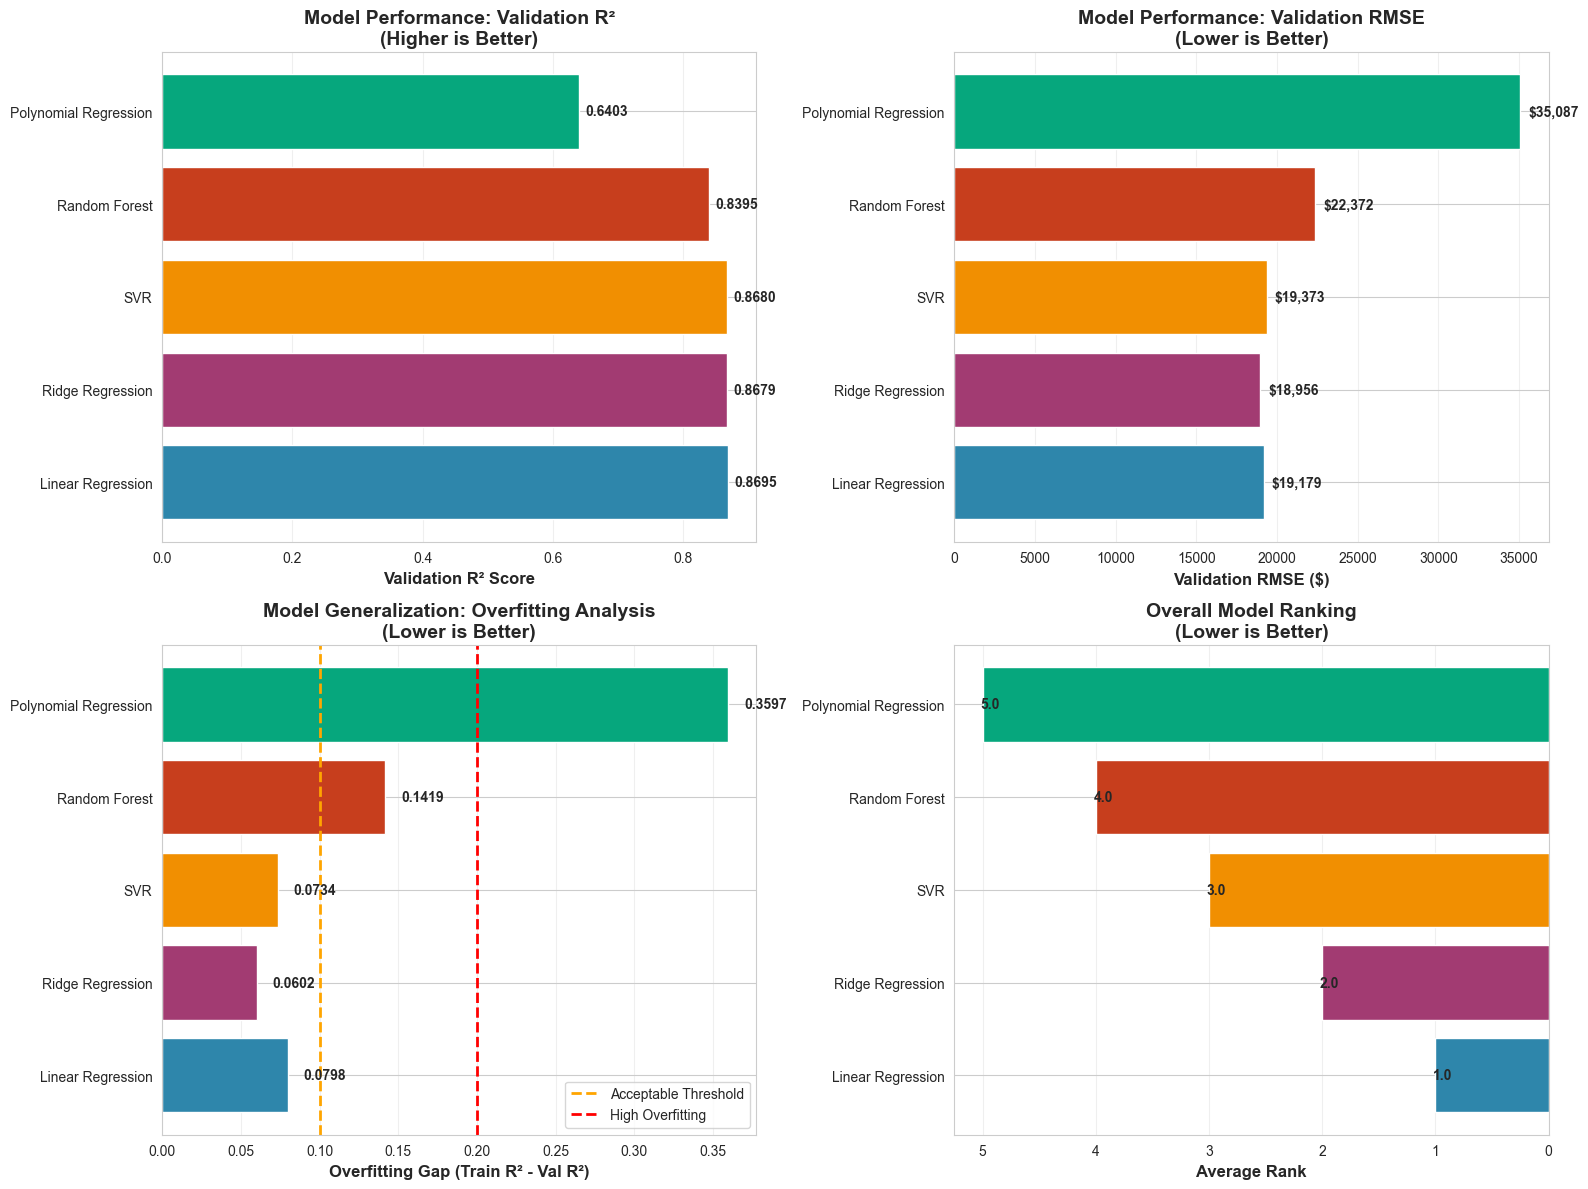


DETAILED METRICS TABLE


C:\Users\herod\AppData\Local\Temp\ipykernel_27556\2899020450.py:60: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_best_rank, subset=['Avg Rank'])


,Model,Train R²,Val R²,Val RMSE ($),Val MAE ($),Overfitting Gap,Avg Rank
0,Linear Regression,0.9493,0.8695,"$19,179.33","$13,664.94",0.0798,1
2,Ridge Regression,0.9281,0.8679,"$18,956.31","$13,794.32",0.0602,2
3,SVR,0.9414,0.8680,"$19,372.52","$13,241.95",0.0734,3
4,Random Forest,0.9814,0.8395,"$22,372.09","$14,390.69",0.1419,4
1,Polynomial Regression,1.0000,0.6403,"$35,086.86","$24,093.00",0.3597,5


In [1218]:
# Create visualization of model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Reset model_comparison index for plotting
model_comparison_plot = model_comparison.reset_index(drop=True)

# Define colors for each model
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#06A77D']

# 1. Validation R² Comparison
axes[0, 0].barh(model_comparison_plot['Model'], model_comparison_plot['Val R²'], color=colors)
axes[0, 0].set_xlabel('Validation R² Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Model Performance: Validation R²\n(Higher is Better)', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(model_comparison_plot['Val R²']):
    axes[0, 0].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# 2. Validation RMSE Comparison (Original Scale)
axes[0, 1].barh(model_comparison_plot['Model'], model_comparison_plot['Val RMSE ($)'], color=colors)
axes[0, 1].set_xlabel('Validation RMSE ($)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Model Performance: Validation RMSE\n(Lower is Better)', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(model_comparison_plot['Val RMSE ($)']):
    axes[0, 1].text(v + 500, i, f'${v:,.0f}', va='center', fontweight='bold')

# 3. Overfitting Gap Comparison
axes[1, 0].barh(model_comparison_plot['Model'], model_comparison_plot['Overfitting Gap'], color=colors)
axes[1, 0].set_xlabel('Overfitting Gap (Train R² - Val R²)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Model Generalization: Overfitting Analysis\n(Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 0].axvline(x=0.1, color='orange', linestyle='--', linewidth=2, label='Acceptable Threshold')
axes[1, 0].axvline(x=0.2, color='red', linestyle='--', linewidth=2, label='High Overfitting')
axes[1, 0].grid(axis='x', alpha=0.3)
axes[1, 0].legend()
for i, v in enumerate(model_comparison_plot['Overfitting Gap']):
    axes[1, 0].text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# 4. Overall Ranking
axes[1, 1].barh(model_comparison_plot['Model'], model_comparison_plot['Avg Rank'], color=colors)
axes[1, 1].set_xlabel('Average Rank', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Overall Model Ranking\n(Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 1].invert_xaxis()  # Invert so best (lowest rank) appears on right
axes[1, 1].grid(axis='x', alpha=0.3)
for i, v in enumerate(model_comparison_plot['Avg Rank']):
    axes[1, 1].text(v - 0.15, i, f'{v:.1f}', va='center', fontweight='bold', ha='right')

plt.tight_layout()
plt.show()

# Additional detailed comparison table
print("\n" + "="*120)
print("DETAILED METRICS TABLE")
print("="*120)
detailed_table = model_comparison[['Model', 'Train R²', 'Val R²', 'Val RMSE ($)', 'Val MAE ($)', 'Overfitting Gap', 'Avg Rank']].copy()

# Create styled detailed table with comprehensive formatting
styled_detailed = (detailed_table.style
    .background_gradient(subset=['Train R²', 'Val R²'], cmap='BuGn', vmin=0, vmax=1)
    .background_gradient(subset=['Val RMSE ($)', 'Val MAE ($)'], cmap='OrRd_r')
    .background_gradient(subset=['Overfitting Gap'], cmap='RdYlGn_r', vmin=0, vmax=0.4)
    .applymap(highlight_best_rank, subset=['Avg Rank'])
    .format({
        'Train R²': '{:.4f}',
        'Val R²': '{:.4f}',
        'Val RMSE ($)': '${:,.2f}',
        'Val MAE ($)': '${:,.2f}',
        'Overfitting Gap': '{:.4f}',
        'Avg Rank': '{:.0f}'
    })
    .set_properties(**{
        'text-align': 'center',
    })
    .set_properties(**{
        'text-align': 'left',
        'font-weight': 'bold',
    }, subset=['Model'])
    .set_table_styles([
        {'selector': 'th', 'props': [
            ('background-color', '#2C3E50'),
            ('color', 'white'),
            ('font-weight', 'bold'),
            ('text-align', 'center'),
            ('padding', '12px'),
            ('font-size', '13px'),
        ]},
        {'selector': 'td', 'props': [
            ('padding', '10px'),
            ('font-size', '12px')
        ]},
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#E8F4F8')
        ]},
        {'selector': '', 'props': [
            ('border-collapse', 'collapse'),
            ('margin', '25px auto'),
            ('font-family', 'Arial, Helvetica, sans-serif'),
            ('box-shadow', '0 0 25px rgba(0,0,0,0.2)'),
            ('border-radius', '8px'),
            ('overflow', 'hidden')
        ]}
    ])
    .set_caption("📊 Comprehensive Model Performance Metrics")
)

display(styled_detailed)
print("="*120)